# Laboratorio 1
## Precios
### Javier Ovalle, José Ángel Morales, Ricardo Morales; 22103, 22689, 22289
### Data Science
Link del repositorio: https://github.com/Saiyan-Javi/Lab1DS

Librerías a utilizar importadas de una vez al inicio del archivo:

In [ ]:
%%sql


In [18]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [1]:
import numpy
numpy.version.version

'2.3.1'

In [8]:
from bs4 import BeautifulSoup
import csv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale # Importar la librería locale para manejar el idioma
from scipy.stats import shapiro, normaltest # Para pruebas de normalidad
from statsmodels.tsa.stattools import adfuller

In [10]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

## 1. Análisis exploratorio de las importaciones de las gasolinas regular, super, diesel y gas de petroleo

Intentando cargar archivo Excel desde: C:/Users/ricar/Downloads/Precios.xlsx
Usando hoja: Hoja1
Columnas seleccionadas: ['Superior', 'Regular', 'Diesel', 'Bunker']
Columna de fecha: FECHA

Archivo de Excel cargado exitosamente.

Iniciando Análisis Exploratorio de Datos (EDA)

Columna 'FECHA' convertida a tipo: datetime64[ns]

Columnas seleccionadas para el análisis: ['Superior', 'Regular', 'Diesel', 'Bunker'] y FECHA

--- 1. Información General y Estadísticas Descriptivas ---

Información del DataFrame (primeras filas):

   Superior  Regular  Diesel  Bunker      FECHA
0     21.91    21.11   17.61   13.40 2021-01-01
1     21.91    21.11   17.61   13.40 2021-01-02
2     21.91    21.11   17.61   13.40 2021-01-03
3     21.91    21.11   17.61   13.45 2021-01-04
4     21.91    21.11   17.61   13.45 2021-01-05


Estadísticas descriptivas de las columnas seleccionadas:

           count       mean       std    min    25%    50%     75%    max
Superior  1655.0  32.149142  3.816833  21.91  29.51

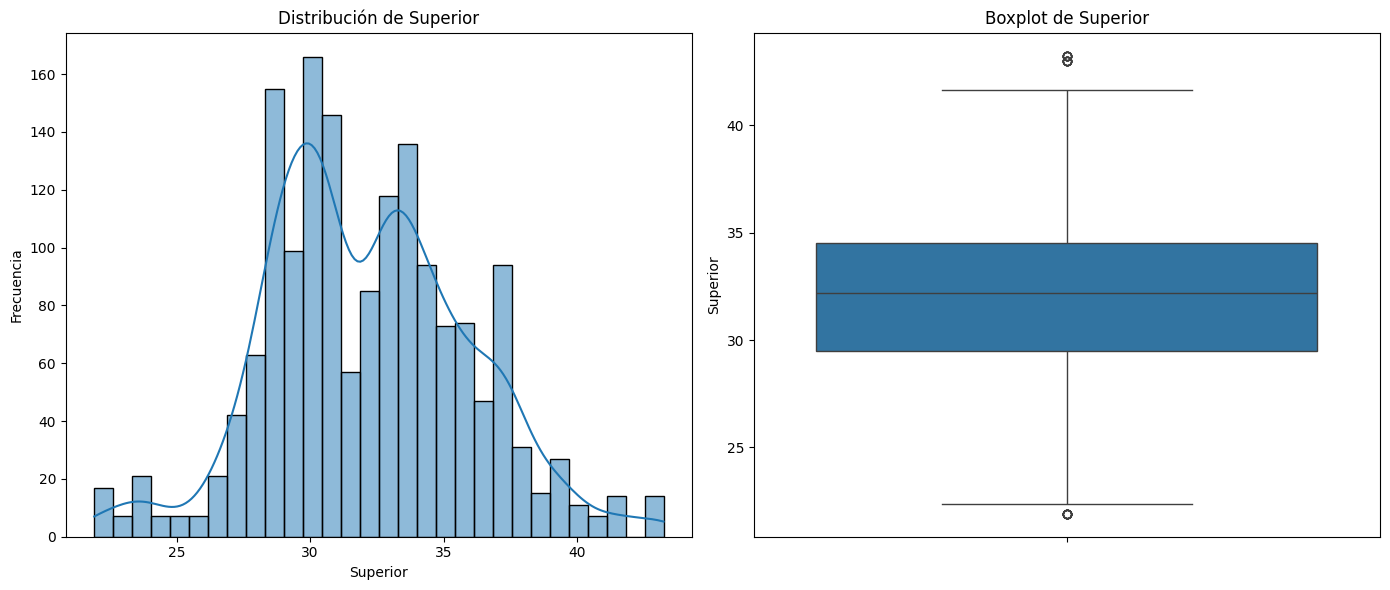

Estadísticas de Distribución para 'Superior':
  - Media: 32.15
  - Mediana: 32.19
  - Desviación Estándar: 3.82
  - Asimetría (Skewness): 0.16
  - Curtosis (Kurtosis): 0.14
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estadística: 0.989, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hipótesis nula (los datos NO parecen normales).
----------------------------------------------------------------------



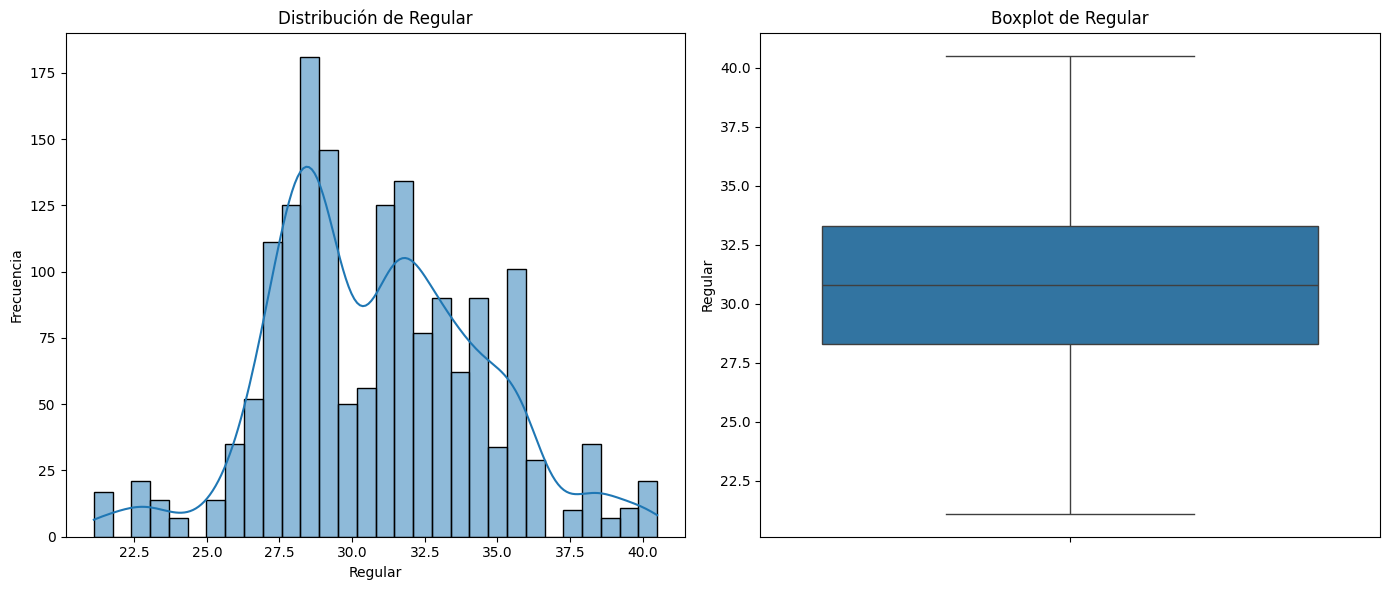

Estadísticas de Distribución para 'Regular':
  - Media: 30.84
  - Mediana: 30.78
  - Desviación Estándar: 3.61
  - Asimetría (Skewness): 0.18
  - Curtosis (Kurtosis): 0.05
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estadística: 0.984, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hipótesis nula (los datos NO parecen normales).
----------------------------------------------------------------------



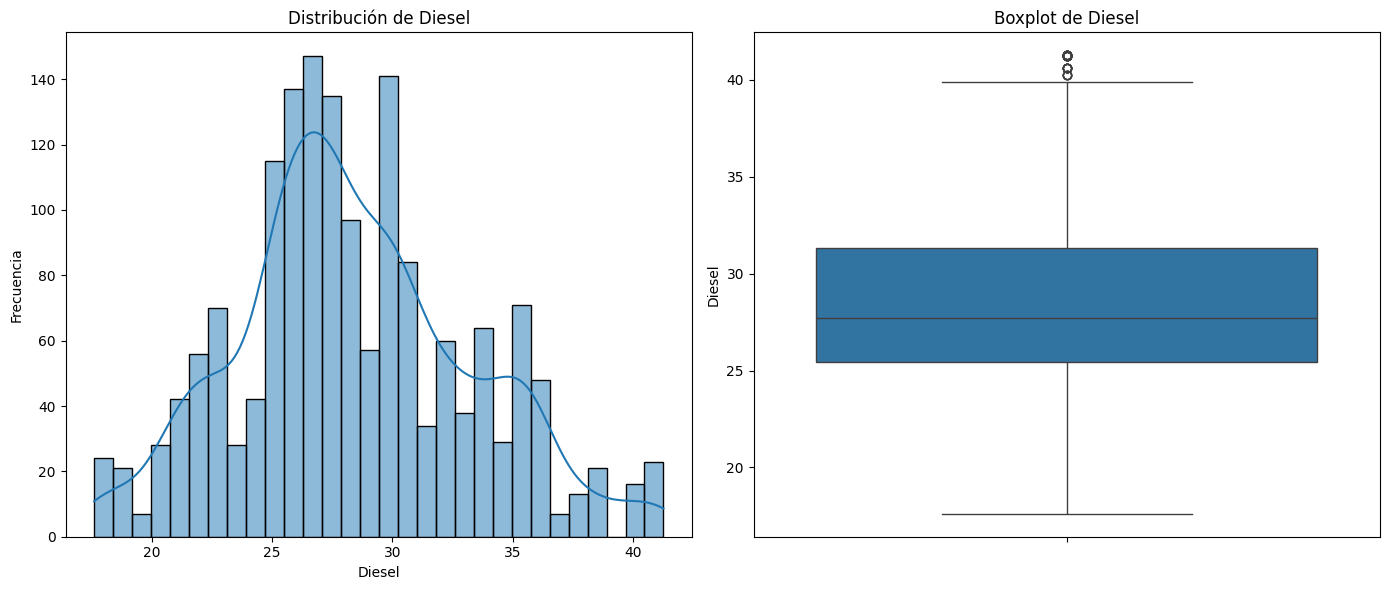

Estadísticas de Distribución para 'Diesel':
  - Media: 28.41
  - Mediana: 27.73
  - Desviación Estándar: 4.87
  - Asimetría (Skewness): 0.29
  - Curtosis (Kurtosis): -0.15
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estadística: 0.987, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hipótesis nula (los datos NO parecen normales).
----------------------------------------------------------------------



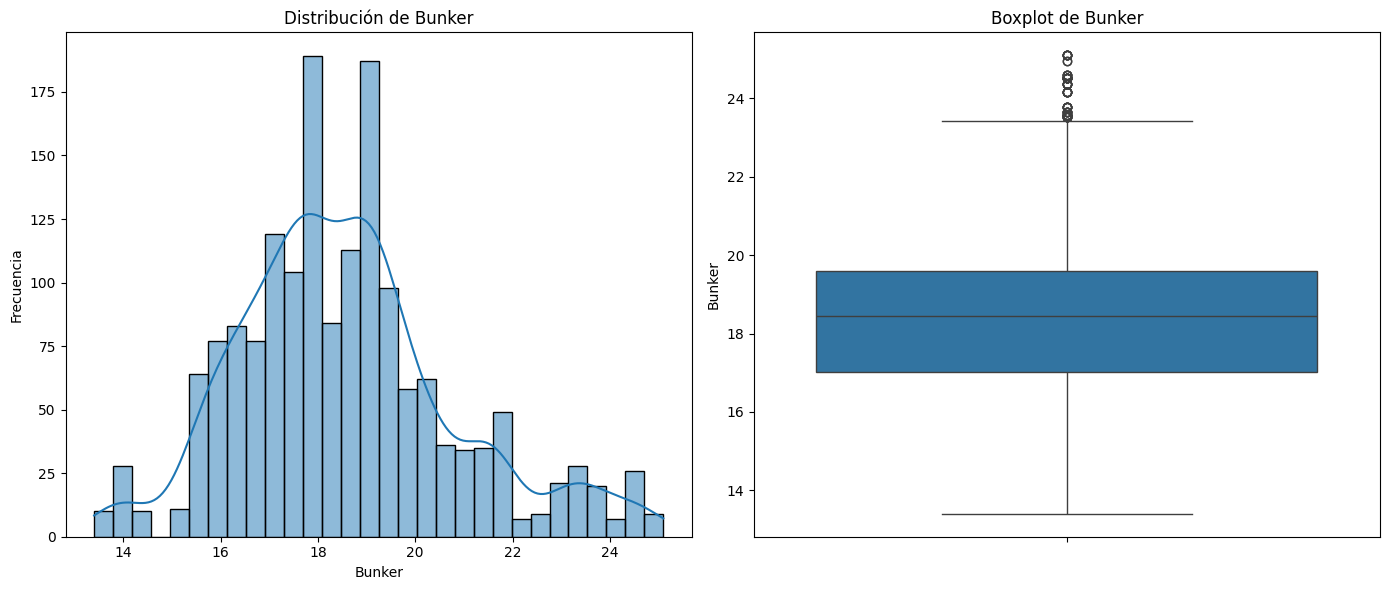

Estadísticas de Distribución para 'Bunker':
  - Media: 18.56
  - Mediana: 18.44
  - Desviación Estándar: 2.25
  - Asimetría (Skewness): 0.58
  - Curtosis (Kurtosis): 0.41
  - Prueba de Normalidad (Shapiro-Wilk):
    - Estadística: 0.970, p-valor: 0.000
    - Con un nivel de significancia de 0.05, se rechaza la hipótesis nula (los datos NO parecen normales).
----------------------------------------------------------------------


----------------------------------------------------------------------

--- 3. Análisis de Correlación ---

Matriz de Correlación de Pearson:

          Superior   Regular    Diesel    Bunker
Superior  1.000000  0.991946  0.871770  0.686633
Regular   0.991946  1.000000  0.867256  0.672843
Diesel    0.871770  0.867256  1.000000  0.473921
Bunker    0.686633  0.672843  0.473921  1.000000




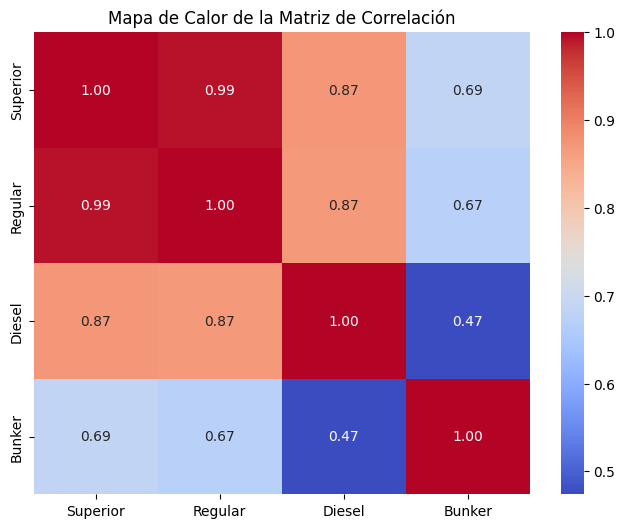

Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente.

----------------------------------------------------------------------

--- 4. Análisis del Comportamiento Temporal (Anual) ---

Tendencia anual de precios (Picos por Año y Tipo de Combustible):



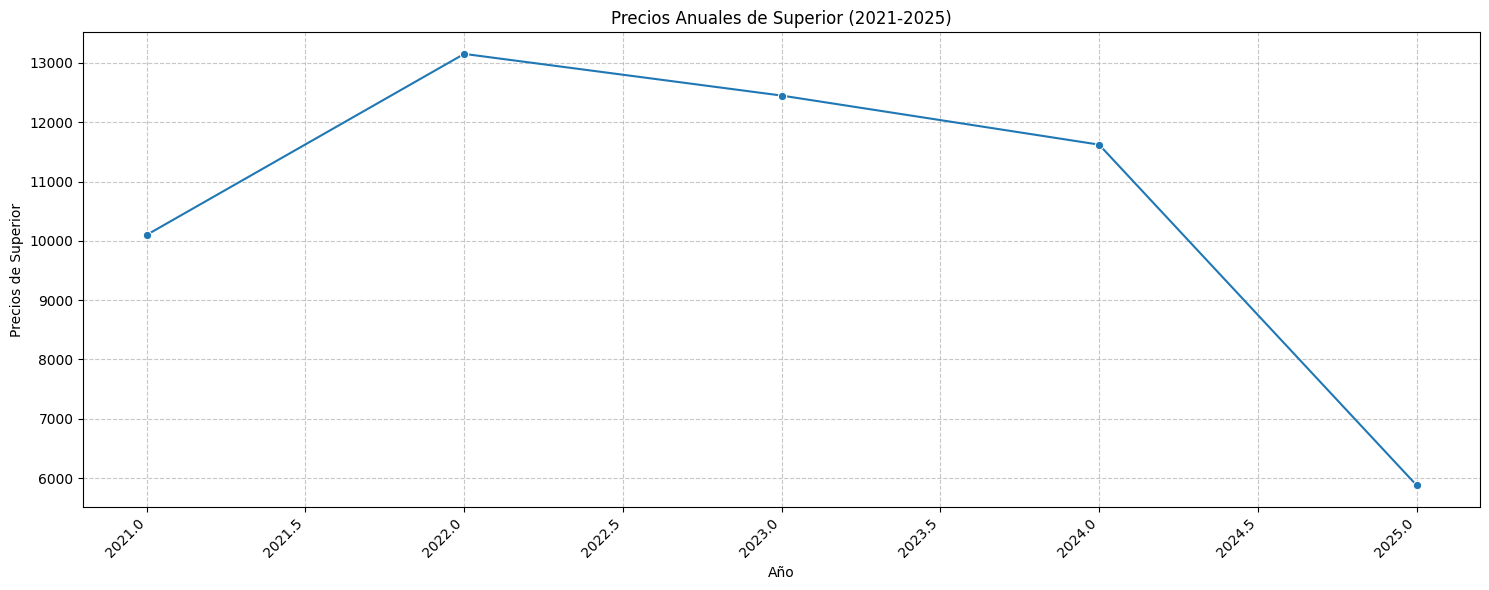

    - Pico anual para Superior: 13152.89 en el año 2022
    - Valle anual para Superior: 5880.15 en el año 2025



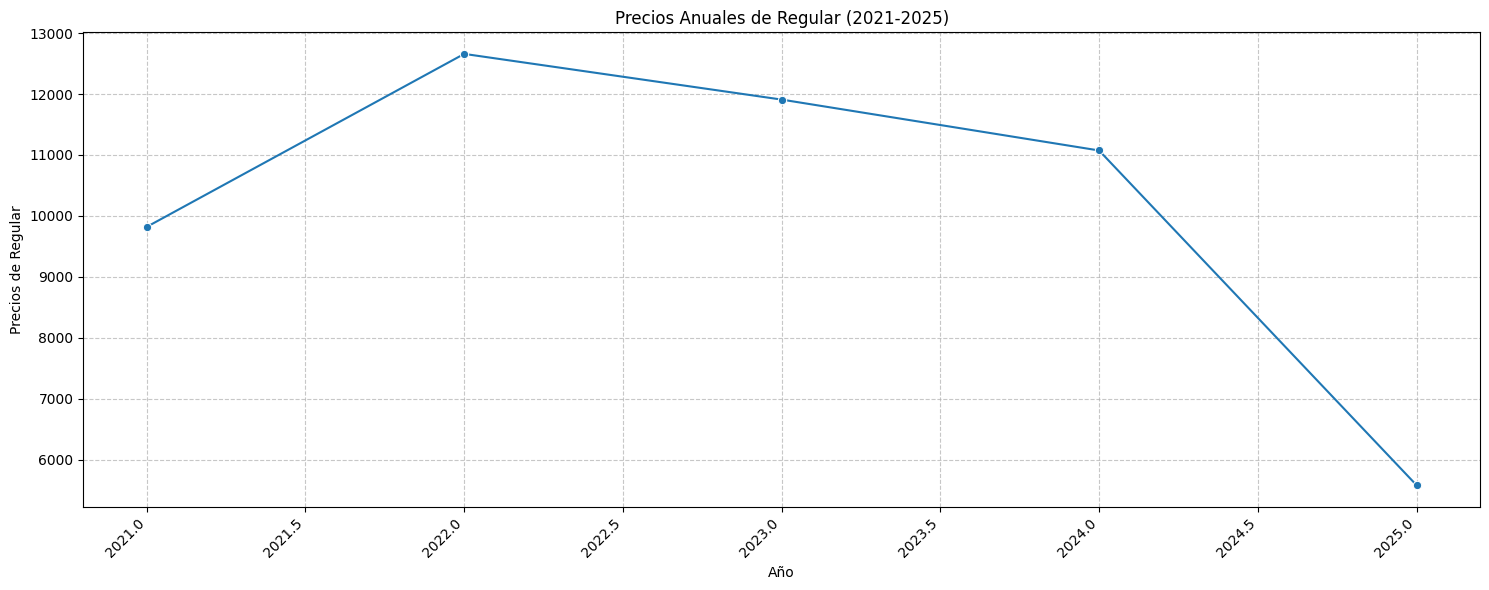

    - Pico anual para Regular: 12658.71 en el año 2022
    - Valle anual para Regular: 5581.50 en el año 2025



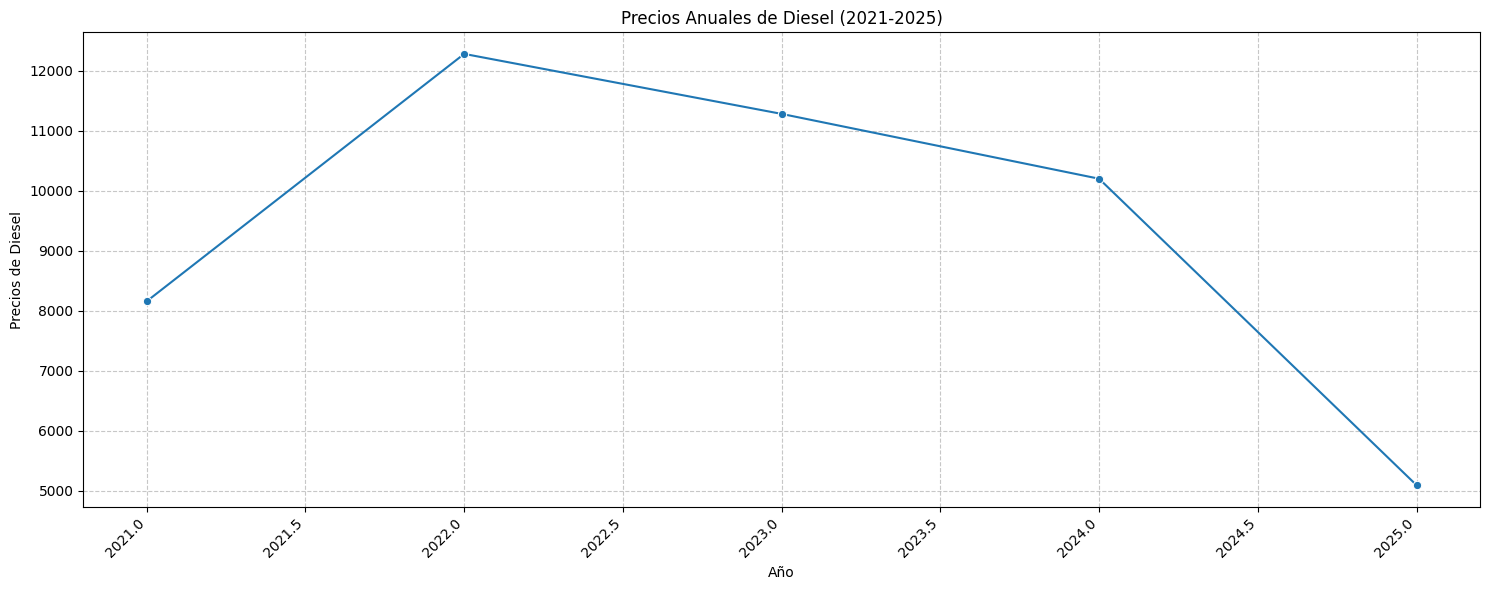

    - Pico anual para Diesel: 12280.58 en el año 2022
    - Valle anual para Diesel: 5093.98 en el año 2025



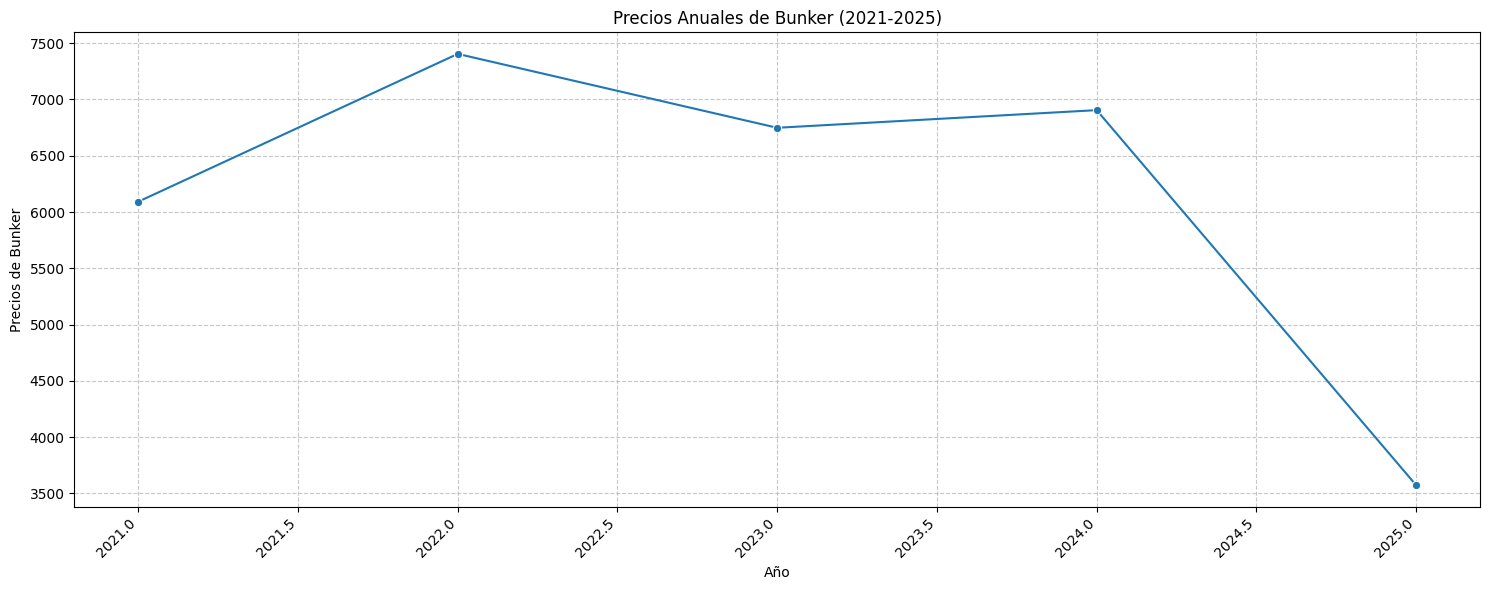

    - Pico anual para Bunker: 7404.70 en el año 2022
    - Valle anual para Bunker: 3573.81 en el año 2025


----------------------------------------------------------------------

--- 5. Análisis de Comportamiento en Períodos Específicos ---

Comportamiento en los Últimos 5 Años:

  Debug: Rango de años para 'últimos 5': 2021-2025
  Debug: Filas en df_ultimos_años: 1655


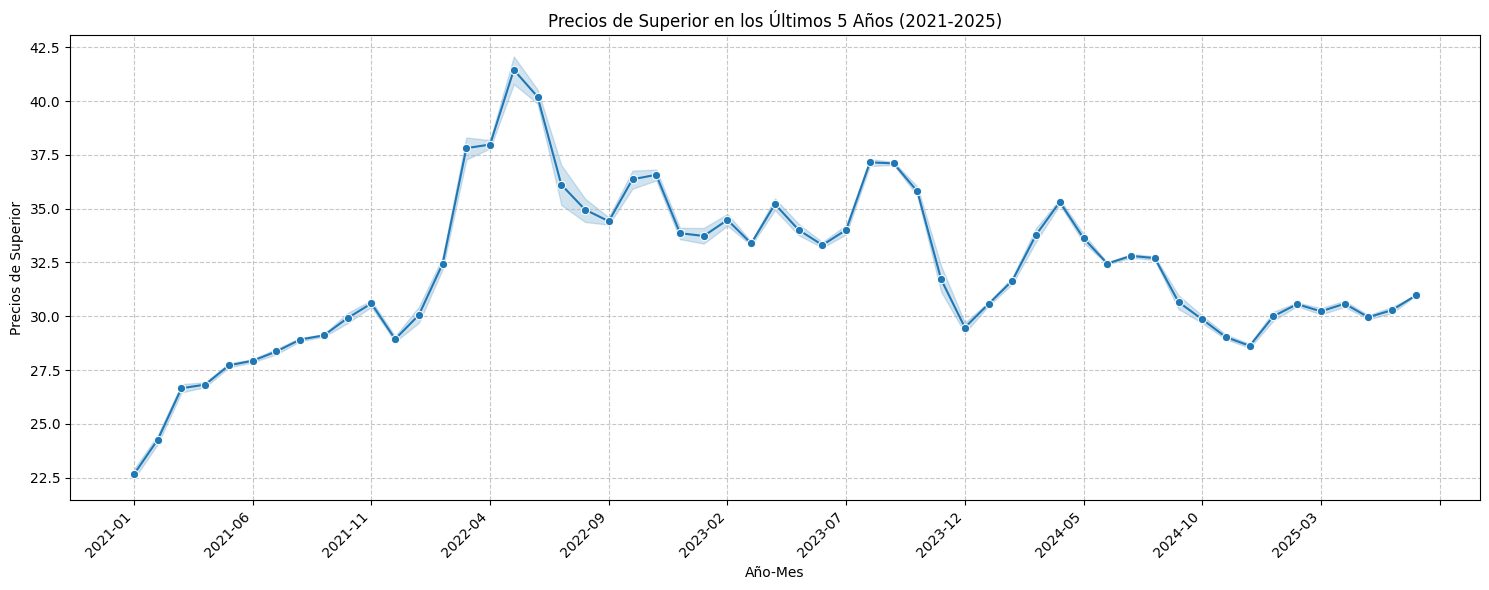

    - Tendencia de Superior en los últimos 5 años.



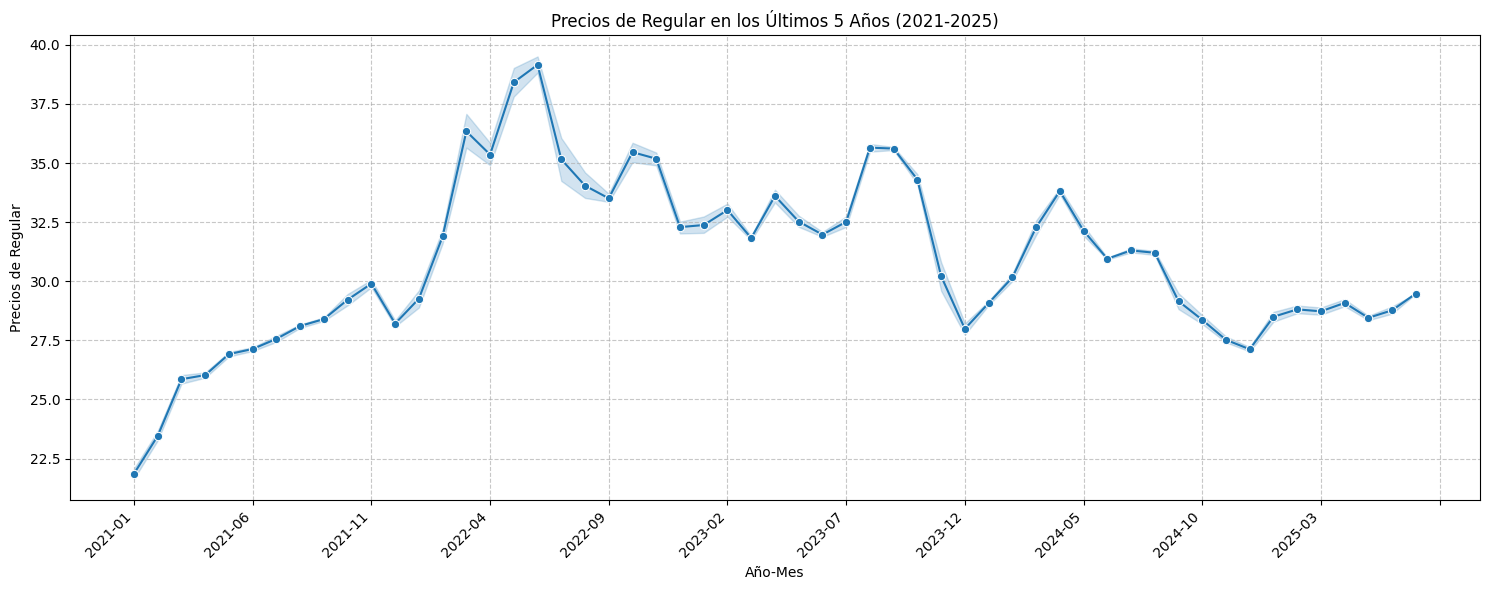

    - Tendencia de Regular en los últimos 5 años.



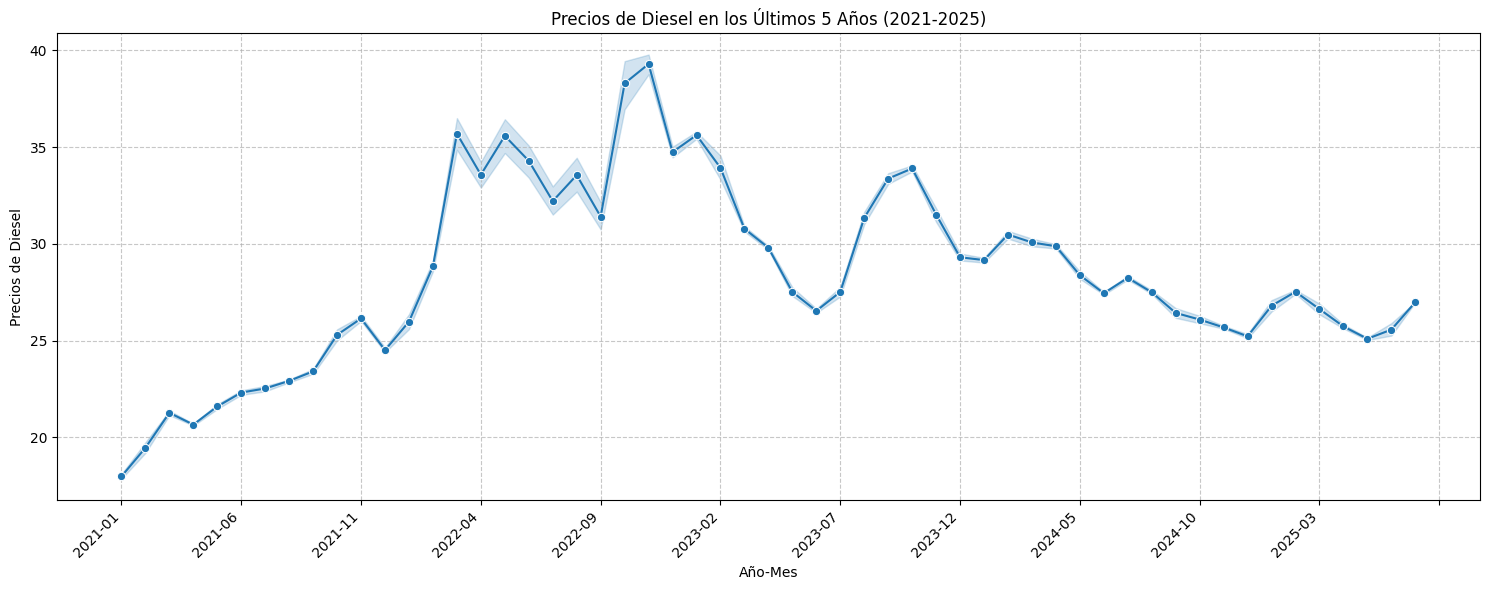

    - Tendencia de Diesel en los últimos 5 años.



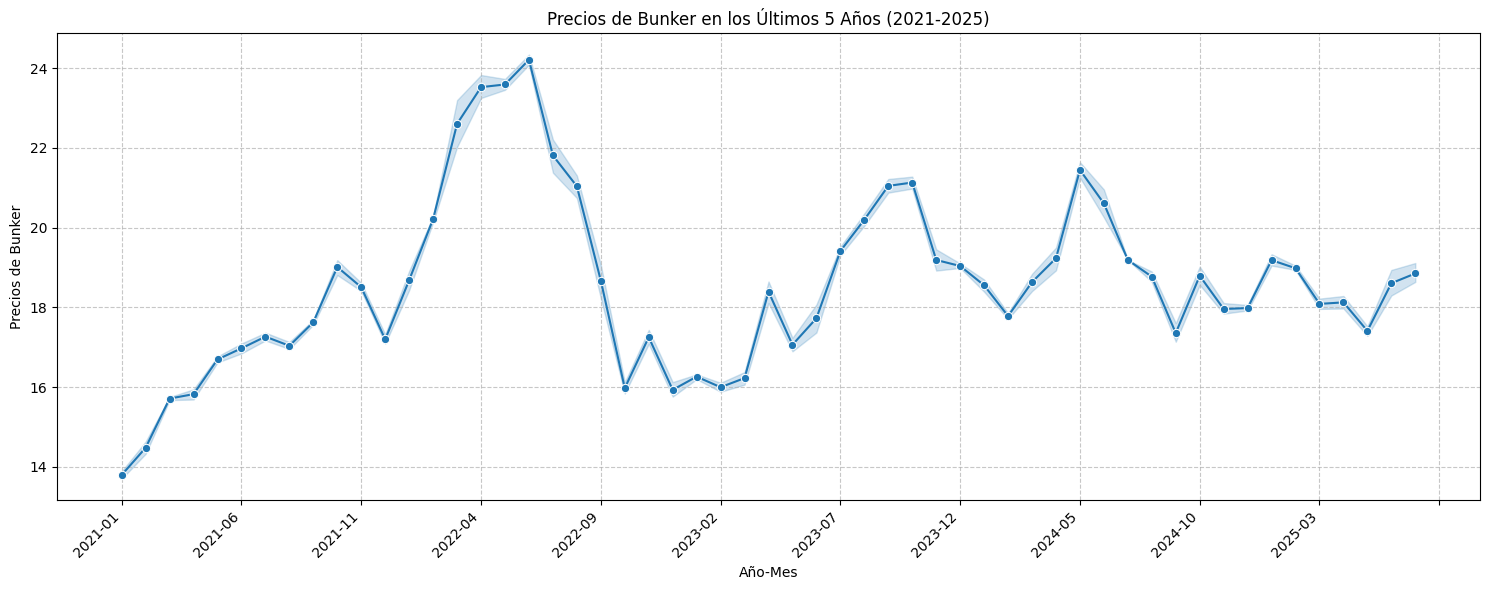

    - Tendencia de Bunker en los últimos 5 años.


----------------------------------------------------------------------

Comportamiento Durante la Pandemia (2020-01 a 2021-12):

  Debug: Filas en df_pandemia: 365


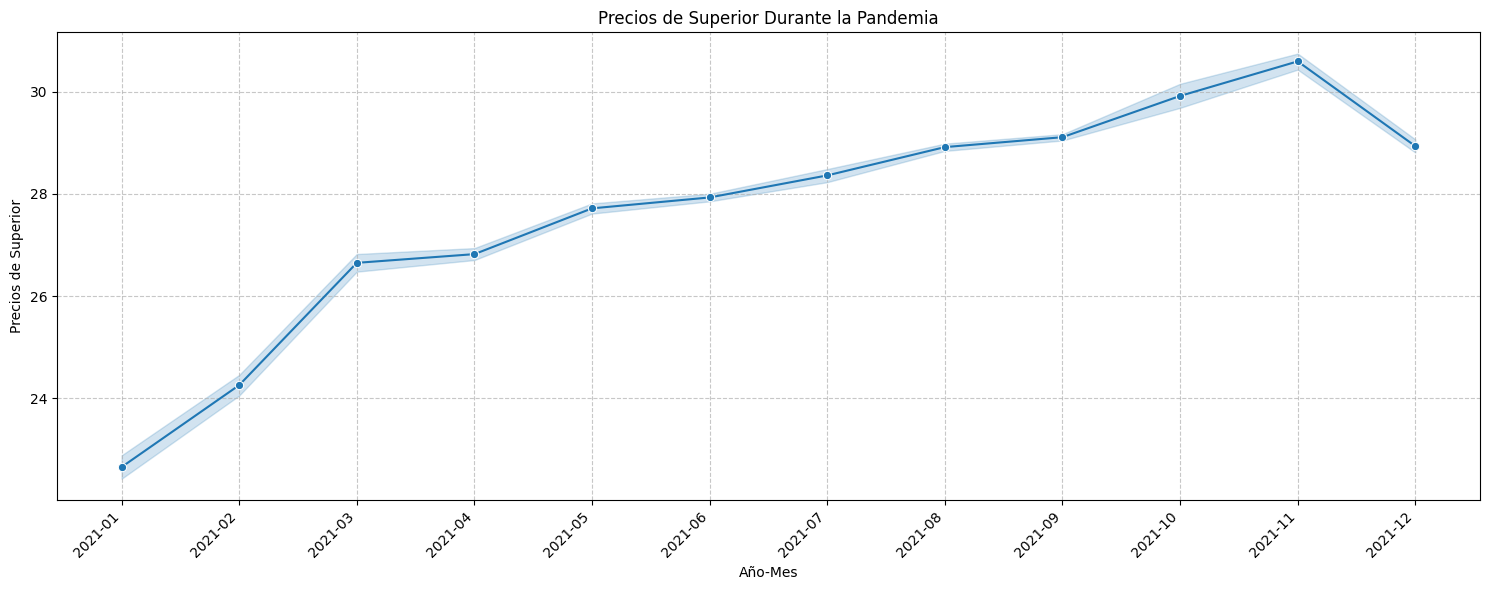

    - Tendencia de Superior durante la pandemia. Media: 27.67



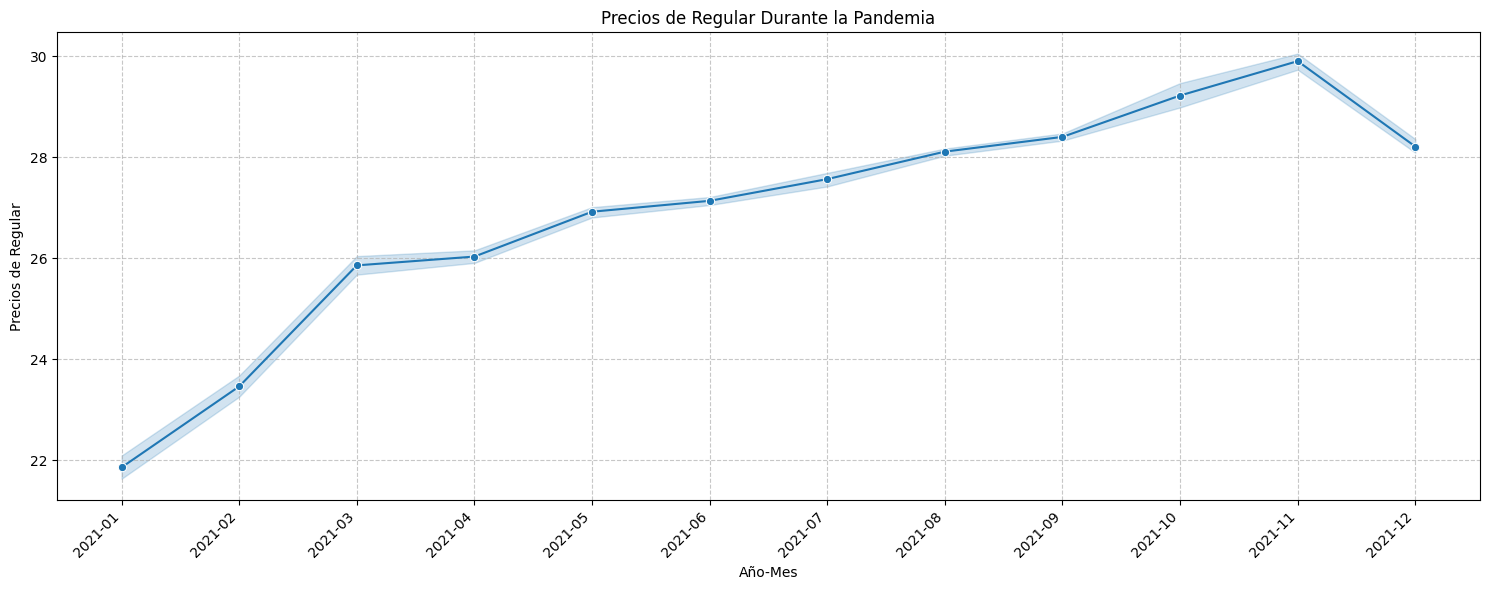

    - Tendencia de Regular durante la pandemia. Media: 26.90



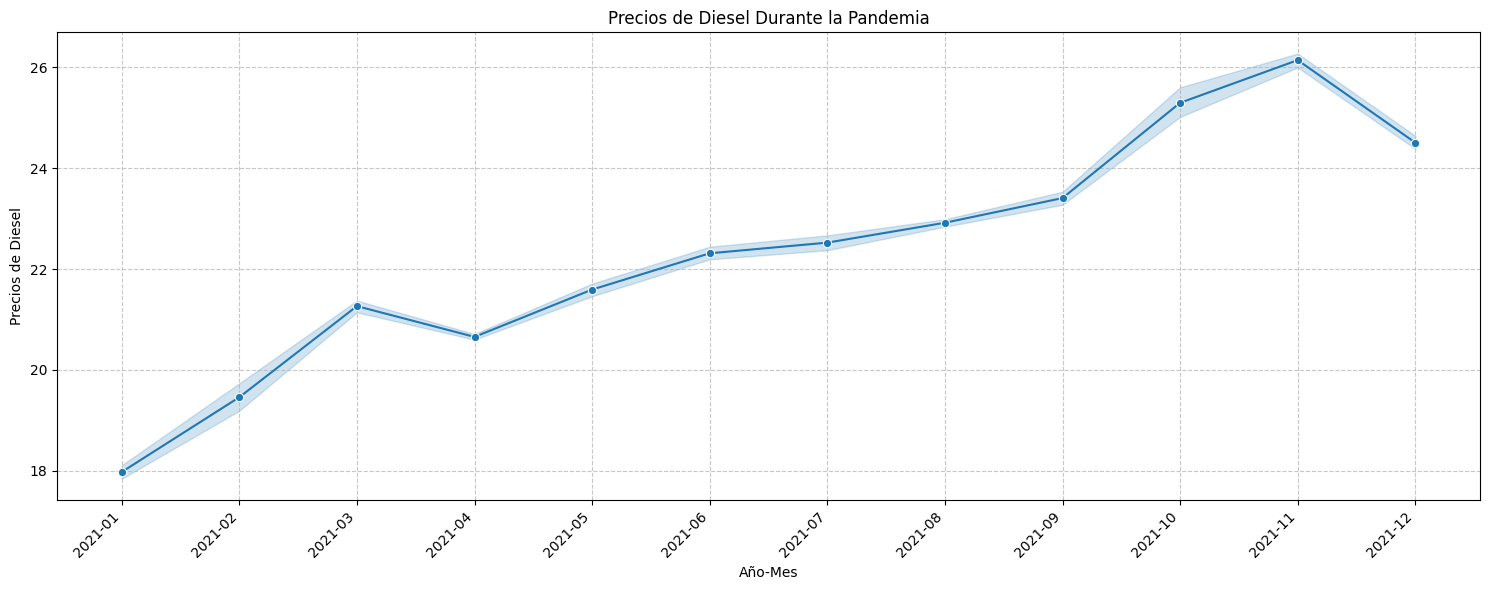

    - Tendencia de Diesel durante la pandemia. Media: 22.35



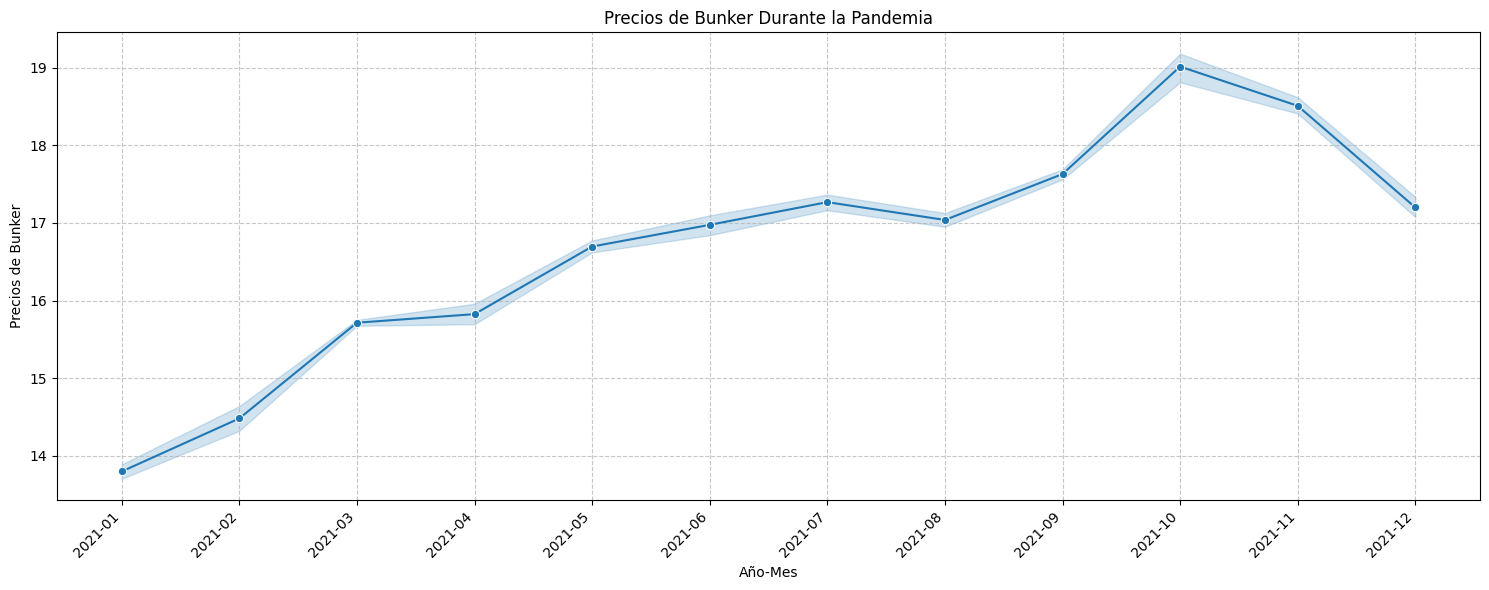

    - Tendencia de Bunker durante la pandemia. Media: 16.69


----------------------------------------------------------------------

Análisis Exploratorio de Datos completado. ¡Todos los puntos cubiertos!


In [23]:

try:
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'es_ES')
    except locale.Error:
        try:
            locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')
        except locale.Error:
            print("Advertencia: No se pudo establecer la configuración regional en español para el manejo de fechas. "
                  "La conversión de fechas con nombres de mes ('ene', 'feb') podría fallar.")
            print("Por favor, verifica las opciones de locale para tu sistema operativo.")


def exploracion_eda(df, columnas_seleccionadas, columna_fecha):
    """
    Realiza un análisis exploratorio de datos (EDA) en columnas específicas de un DataFrame,
    incluyendo distribución, correlación, histogramas de fecha y análisis de requisitos específicos.

    Args:
        df (pd.DataFrame): El DataFrame de Pandas a analizar.
        columnas_seleccionadas (list): Una lista de las 4 columnas específicas a analizar (o más).
        columna_fecha (str): El nombre de la columna que contiene los datos de fecha.
    """

    print("Iniciando Análisis Exploratorio de Datos (EDA)\n")

    # Verificar que las columnas existan en el DataFrame
    for col in columnas_seleccionadas + [columna_fecha]:
        if col not in df.columns:
            print(f"Error: La columna '{col}' no se encuentra en el DataFrame. Por favor, verifica los nombres.")
            return

    df_seleccionado = df[columnas_seleccionadas + [columna_fecha]].copy()

    # Convertir la columna de fecha a formato datetime
    try:
        df_seleccionado[columna_fecha] = pd.to_datetime(df_seleccionado[columna_fecha], format='%b/%Y')
        print(f"Columna '{columna_fecha}' convertida a tipo: {df_seleccionado[columna_fecha].dtype}\n")
    except Exception as e:
        print(f"Error CRÍTICO: No se pudo convertir la columna '{columna_fecha}' a datetime con el formato '%b/%Y'.")
        print(f"Mensaje de error: {e}")
        print("Asegúrate de que las fechas en tu Excel tengan el formato 'mes_abreviado/año' (ej. 'ene/2001') "
              "y que la configuración regional en español se haya aplicado correctamente.")
        return # Salir si la fecha no se puede convertir, ya que muchas partes dependen de ello

    print(f"Columnas seleccionadas para el análisis: {columnas_seleccionadas} y {columna_fecha}\n")

    # --- 1. Información General y Estadísticas Descriptivas ---
    print("--- 1. Información General y Estadísticas Descriptivas ---\n")
    print("Información del DataFrame (primeras filas):\n")
    print(df_seleccionado.head())
    print("\n")

    print("Estadísticas descriptivas de las columnas seleccionadas:\n")
    print(df_seleccionado[columnas_seleccionadas].describe().T)
    print("\n")

    print("Valores nulos por columna:\n")
    print(df_seleccionado[columnas_seleccionadas + [columna_fecha]].isnull().sum())
    print("\n" + "-"*70 + "\n")

    # --- 2. Análisis de Distribución (Histogramas, Boxplots y Pruebas de Normalidad) ---
    print("--- 2. Análisis de Distribución (Histogramas, Boxplots y Pruebas de Normalidad) ---\n")
    numeric_cols = df_seleccionado[columnas_seleccionadas].select_dtypes(include=np.number).columns.tolist()

    if not numeric_cols:
        print("No hay columnas numéricas continuas entre las seleccionadas para el análisis de distribución.")
    else:
        for col in numeric_cols:
            plt.figure(figsize=(14, 6))

            # Histograma
            plt.subplot(1, 2, 1)
            sns.histplot(df_seleccionado[col].dropna(), kde=True, bins=30)
            plt.title(f'Distribución de {col}')
            plt.xlabel(col)
            plt.ylabel('Frecuencia')

            # Boxplot
            plt.subplot(1, 2, 2)
            sns.boxplot(y=df_seleccionado[col].dropna())
            plt.title(f'Boxplot de {col}')
            plt.ylabel(col)

            plt.tight_layout()
            plt.show()

            print(f"Estadísticas de Distribución para '{col}':")
            print(f"  - Media: {df_seleccionado[col].mean():.2f}")
            print(f"  - Mediana: {df_seleccionado[col].median():.2f}")
            print(f"  - Desviación Estándar: {df_seleccionado[col].std():.2f}")
            print(f"  - Asimetría (Skewness): {df_seleccionado[col].skew():.2f}")
            print(f"  - Curtosis (Kurtosis): {df_seleccionado[col].kurtosis():.2f}")

            # Prueba de normalidad (Shapiro-Wilk para N < 5000, D'Agostino-Pearson para N >= 20)
            data_to_test = df_seleccionado[col].dropna()
            if len(data_to_test) >= 20: # Tamaño mínimo para las pruebas
                if len(data_to_test) < 5000:
                    try:
                        stat, p = shapiro(data_to_test)
                        test_name = "Shapiro-Wilk"
                    except Exception as test_e:
                        print(f"  - Error al ejecutar Shapiro-Wilk: {test_e}. Intentando D'Agostino-Pearson.")
                        stat, p = normaltest(data_to_test)
                        test_name = "D'Agostino-Pearson"
                else:
                    stat, p = normaltest(data_to_test) # D'Agostino-Pearson
                    test_name = "D'Agostino-Pearson"

                print(f"  - Prueba de Normalidad ({test_name}):")
                print(f"    - Estadística: {stat:.3f}, p-valor: {p:.3f}")
                alpha = 0.05
                if p > alpha:
                    print(f"    - Con un nivel de significancia de {alpha}, no se puede rechazar la hipótesis nula (los datos parecen normales).")
                else:
                    print(f"    - Con un nivel de significancia de {alpha}, se rechaza la hipótesis nula (los datos NO parecen normales).")
            else:
                print("  - No hay suficientes datos para realizar una prueba de normalidad formal (se necesitan al menos 20 observaciones).")

            print("-" * 70 + "\n")
    print("\n" + "-"*70 + "\n")

    # --- 3. Análisis de Correlación (entre columnas numéricas) ---
    print("--- 3. Análisis de Correlación ---\n")
    if len(numeric_cols) > 1:
        corr_matrix = df_seleccionado[numeric_cols].corr()
        print("Matriz de Correlación de Pearson:\n")
        print(corr_matrix)
        print("\n")

        plt.figure(figsize=(8, 6))
        sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
        plt.title('Mapa de Calor de la Matriz de Correlación')
        plt.show()
        print("Los valores cercanos a 1 o -1 indican una fuerte correlación positiva o negativa, respectivamente.")
    else:
        print("Se necesitan al menos dos columnas numéricas para calcular la correlación.")
    print("\n" + "-"*70 + "\n")

    # --- 4. Comportamiento Temporal (Agrupado por Año y Mes Estacional) ---
    print(f"--- 4. Análisis del Comportamiento Temporal (Anual) ---\n")
    if not numeric_cols:
        print(f"No hay columnas numéricas continuas para graficar con '{columna_fecha}'.")
    elif not pd.api.types.is_datetime64_any_dtype(df_seleccionado[columna_fecha]):
        print(f"La columna '{columna_fecha}' no es un tipo de dato datetime válido. No se puede generar la tendencia temporal.")
        return # *** AÑADIDO: Si la fecha no es datetime, salimos de esta sección. ***
    else:
        # Agregación anual para picos anuales
        df_seleccionado['año'] = df_seleccionado[columna_fecha].dt.year
        # Es mejor usar .sum() para precios totales anuales
        df_anual = df_seleccionado.groupby('año')[numeric_cols].sum().reset_index()

        print("Tendencia anual de precios (Picos por Año y Tipo de Combustible):\n")
        for col in numeric_cols:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df_anual['año'], y=df_anual[col], marker='o')
            plt.title(f'Precios Anuales de {col} ({df_anual["año"].min()}-{df_anual["año"].max()})')
            plt.xlabel('Año')
            plt.ylabel(f'Precios de {col}')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            
            # Manejo de casos donde idxmax/idxmin podrían devolver NaN si la columna tiene solo NaNs
            if not df_anual[col].isnull().all():
                max_anual = df_anual.loc[df_anual[col].idxmax()]
                min_anual = df_anual.loc[df_anual[col].idxmin()]
                print(f"    - Pico anual para {col}: {max_anual[col]:.2f} en el año {int(max_anual['año'])}")
                print(f"    - Valle anual para {col}: {min_anual[col]:.2f} en el año {int(min_anual['año'])}\n")
            else:
                print(f"    - No hay datos válidos para {col} en el análisis anual.\n")
        print("\n" + "-"*70 + "\n")


    # --- 5. Comportamiento en los últimos X años y durante la Pandemia ---
    print("--- 5. Análisis de Comportamiento en Períodos Específicos ---\n")

    # Asegurarse de que 'año' esté presente antes de usarlo en esta sección
    if 'año' not in df_seleccionado.columns:
        df_seleccionado['año'] = df_seleccionado[columna_fecha].dt.year

    # Comportamiento en los últimos X años
    años_recientes = 5 # Puedes ajustar este valor si quieres ver más o menos años
    print(f"Comportamiento en los Últimos {años_recientes} Años:\n")
    
    año_actual = df_seleccionado['año'].max() # Usar la columna 'año' ya creada
    año_inicio_reciente = año_actual - años_recientes + 1
    
    df_ultimos_años = df_seleccionado[df_seleccionado['año'] >= año_inicio_reciente].copy()

    print(f"  Debug: Rango de años para 'últimos {años_recientes}': {año_inicio_reciente}-{año_actual}")
    print(f"  Debug: Filas en df_ultimos_años: {len(df_ultimos_años)}")

    if not df_ultimos_años.empty:
        df_ultimos_años['año_mes'] = df_ultimos_años[columna_fecha].dt.to_period('M')
        df_ultimos_años = df_ultimos_años.sort_values(by=columna_fecha)

        for col in numeric_cols:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df_ultimos_años['año_mes'].astype(str), y=df_ultimos_años[col], marker='o')
            plt.title(f'Precios de {col} en los Últimos {años_recientes} Años ({año_inicio_reciente}-{año_actual})')
            plt.xlabel('Año-Mes')
            plt.ylabel(f'Precios de {col}')
            plt.xticks(rotation=45, ha='right')
            # Ajustar ticks del eje X para que no se superpongan si hay muchos meses
            unique_months_in_period = df_ultimos_años['año_mes'].unique()
            if len(unique_months_in_period) > 12 * 2: # Si hay más de 24 meses, reducir ticks
                 plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=12)) # Mostrar 12 ticks máximo
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            print(f"    - Tendencia de {col} en los últimos {años_recientes} años.\n")
    else:
        print(f"    - No hay datos disponibles para los últimos {años_recientes} años "
              f"({año_inicio_reciente}-{año_actual}) en tu DataFrame.")
    print("\n" + "-"*70 + "\n")

    # Comportamiento durante la pandemia
    # Definir el período de la pandemia. Puedes ajustarlo si es necesario.
    fecha_inicio_pandemia = pd.to_datetime('2020-01-01')
    fecha_fin_pandemia = pd.to_datetime('2021-12-31')

    df_pandemia = df_seleccionado[(df_seleccionado[columna_fecha] >= fecha_inicio_pandemia) &
                                  (df_seleccionado[columna_fecha] <= fecha_fin_pandemia)].copy()

    print(f"Comportamiento Durante la Pandemia ({fecha_inicio_pandemia.strftime('%Y-%m')} a {fecha_fin_pandemia.strftime('%Y-%m')}):\n")
    print(f"  Debug: Filas en df_pandemia: {len(df_pandemia)}")

    if not df_pandemia.empty:
        df_pandemia['año_mes'] = df_pandemia[columna_fecha].dt.to_period('M')
        df_pandemia = df_pandemia.sort_values(by=columna_fecha)

        for col in numeric_cols:
            plt.figure(figsize=(15, 6))
            sns.lineplot(x=df_pandemia['año_mes'].astype(str), y=df_pandemia[col], marker='o')
            plt.title(f'Precios de {col} Durante la Pandemia')
            plt.xlabel('Año-Mes')
            plt.ylabel(f'Precios de {col}')
            plt.xticks(rotation=45, ha='right')
            plt.grid(True, linestyle='--', alpha=0.7)
            plt.tight_layout()
            plt.show()
            print(f"    - Tendencia de {col} durante la pandemia. Media: {df_pandemia[col].mean():.2f}\n")
    else:
        print(f"    - No hay datos disponibles para el período de la pandemia especificado "
              f"({fecha_inicio_pandemia.strftime('%Y-%m')} a {fecha_fin_pandemia.strftime('%Y-%m')}) en tu DataFrame.")
    print("\n" + "-"*70 + "\n")

    print("Análisis Exploratorio de Datos completado. ¡Todos los puntos cubiertos!")

# --- BLOQUE PRINCIPAL PARA CARGAR Y EJECUTAR EL ANÁLISIS ---
if __name__ == '__main__':
    # --- CONFIGURACIÓN PARA TU ARCHIVO DE EXCEL ---
    # 1. **Ruta del Archivo de Excel:** Reemplaza con la ruta completa a tu archivo.
    #    En Windows, usa barras invertidas dobles (\\) o barras diagonales (/).
    ruta_archivo_excel = "C:/Users/ricar/Downloads/Precios.xlsx"

    # 2. **Nombre de la Hoja:** Si tus datos no están en la primera hoja.
    nombre_hoja_excel = 'Hoja1'

    # 3. **Columnas a Analizar:** Los nombres EXACTOS de tus columnas numéricas.
    mis_columnas_a_analizar = ['Superior', 'Regular', 'Diesel', 'Bunker']

    # 4. **Columna de Fecha:** El nombre EXACTO de tu columna de fecha.
    mi_columna_fecha_excel = 'FECHA'

    print(f"Intentando cargar archivo Excel desde: {ruta_archivo_excel}")
    print(f"Usando hoja: {nombre_hoja_excel}")
    print(f"Columnas seleccionadas: {mis_columnas_a_analizar}")
    print(f"Columna de fecha: {mi_columna_fecha_excel}\n")

    try:
        df_desde_excel = pd.read_excel(ruta_archivo_excel, sheet_name=nombre_hoja_excel)
        print("Archivo de Excel cargado exitosamente.\n")

        # Llamar a la función de análisis exploratorio
        exploracion_eda(df_desde_excel, mis_columnas_a_analizar, mi_columna_fecha_excel)

    except FileNotFoundError:
        print(f"Error: El archivo '{ruta_archivo_excel}' no se encontró.")
        print("Por favor, verifica la ruta y el nombre del archivo.")
    except Exception as e:
        print(f"Ocurrió un error inesperado al cargar el archivo de Excel o durante el análisis: {e}")
        print("Asegúrate de que la ruta, el nombre de la hoja y los nombres de las columnas sean correctos.")

# Preparación para las series de tiempo

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import locale
from statsmodels.tsa.arima.model import ARIMA # Para modelos ARIMA
from statsmodels.tsa.forecasting.stl import STL # Para descomposición de series temporales

# --- CONFIGURACIÓN REGIONAL PARA INTERPRETAR MESES EN ESPAÑOL ---
try:
    locale.setlocale(locale.LC_TIME, 'es_ES.UTF-8')
except locale.Error:
    try:
        locale.setlocale(locale.LC_TIME, 'es_ES')
    except locale.Error:
        try:
            locale.setlocale(locale.LC_TIME, 'Spanish_Spain.1252')
        except locale.Error:
            print("⚠️ Advertencia: No se pudo establecer la configuración regional en español para el manejo de fechas. "
                  "La conversión de fechas con nombres de mes ('ene', 'feb') podría fallar.")
            print("Por favor, verifica las opciones de locale para tu sistema operativo.")

# --- Carga de Datos (Necesaria para los siguientes puntos) ---
# Define la ruta a tu archivo y las columnas
ruta_archivo_excel = "C:/Users/ricar/Downloads/Precios.xlsx"
nombre_hoja_excel = 'Hoja1'
mis_columnas_a_analizar = ['Superior', 'Regular', 'Diesel', 'Bunker']
mi_columna_fecha_excel = 'FECHA'

try:
    df_importaciones = pd.read_excel(ruta_archivo_excel, sheet_name=nombre_hoja_excel)
    # Convertir la columna de fecha a formato datetime
    df_importaciones[mi_columna_fecha_excel] = pd.to_datetime(df_importaciones[mi_columna_fecha_excel], format='%b/%Y')
    df_importaciones = df_importaciones.set_index(mi_columna_fecha_excel) # Establecer la fecha como índice
    df_importaciones = df_importaciones[mis_columnas_a_analizar] # Seleccionar solo las columnas de interés
    print("✅ DataFrame de Precios cargado y preprocesado exitosamente.\n")
    print("Primeras 5 filas del DataFrame de Precios:")
    print(df_importaciones.head())
    print("\n")
except FileNotFoundError:
    print(f"❌ Error: El archivo '{ruta_archivo_excel}' no se encontró. Verifica la ruta.")
    df_importaciones = pd.DataFrame() # Crear un DataFrame vacío para evitar errores posteriores
except Exception as e:
    print(f"❌ Ocurrió un error al cargar o procesar el archivo de Excel: {e}")
    df_importaciones = pd.DataFrame() # Crear un DataFrame vacío para evitar errores posteriores

✅ DataFrame de Precios cargado y preprocesado exitosamente.

Primeras 5 filas del DataFrame de Precios:
            Superior  Regular  Diesel  Bunker
FECHA                                        
2021-01-01     21.91    21.11   17.61   13.40
2021-01-02     21.91    21.11   17.61   13.40
2021-01-03     21.91    21.11   17.61   13.40
2021-01-04     21.91    21.11   17.61   13.45
2021-01-05     21.91    21.11   17.61   13.45




--- 2.b: Precios Mensuales de Combustibles (Series Temporales) ---



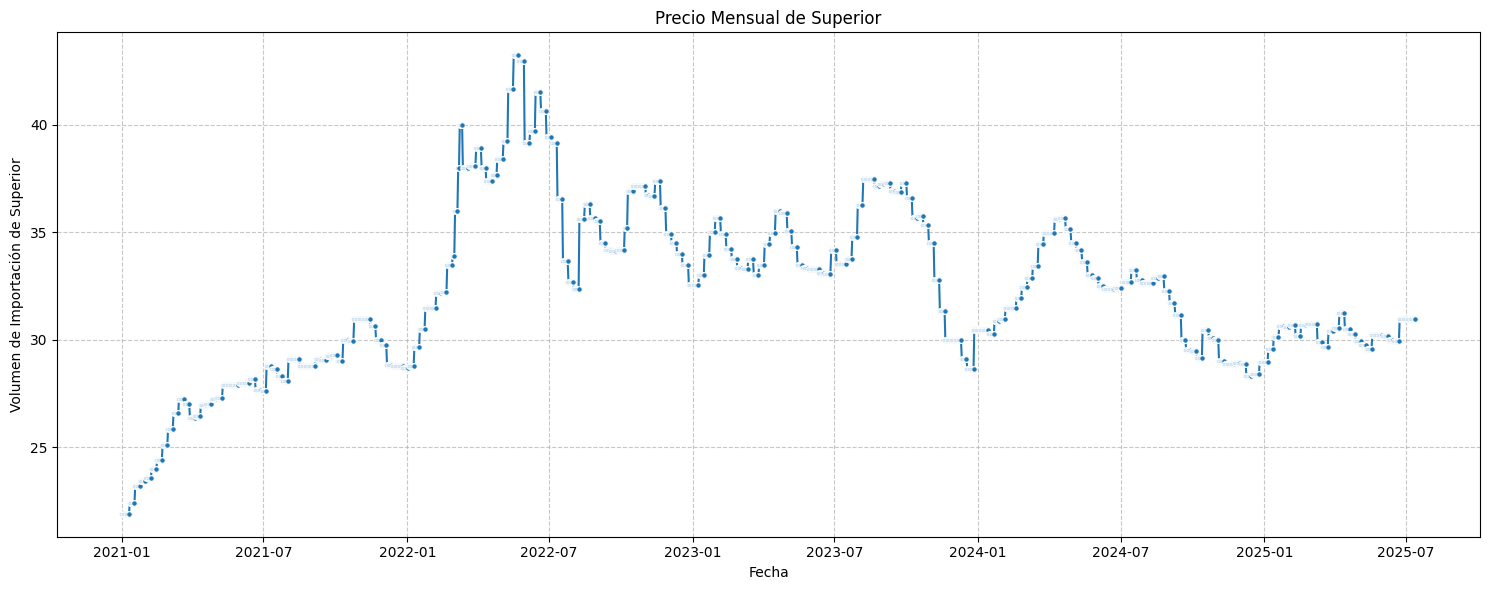

📈 Gráfico de la serie de Importación Mensual de Superior generado.
Estadísticas descriptivas de la serie Superior:
count    1655.000000
mean       32.149142
std         3.816833
min        21.910000
25%        29.510000
50%        32.190000
75%        34.515000
max        43.240000
Name: Superior, dtype: float64
----------------------------------------------------------------------



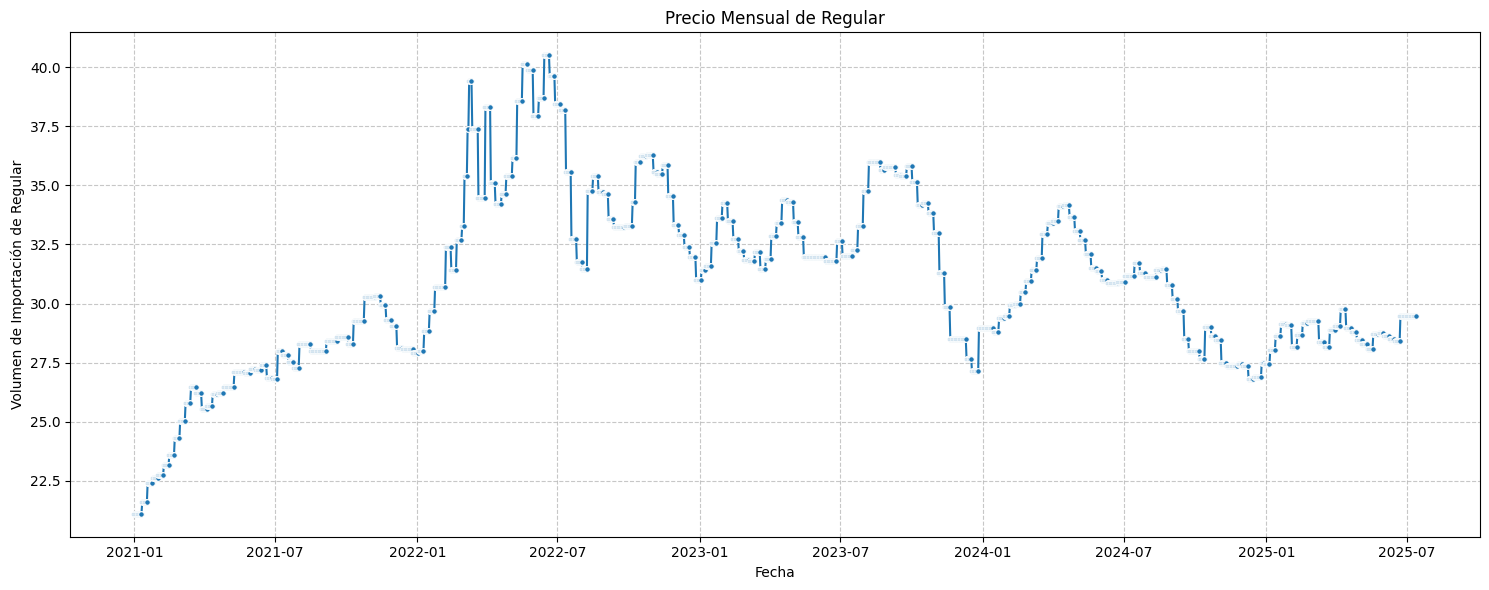

📈 Gráfico de la serie de Importación Mensual de Regular generado.
Estadísticas descriptivas de la serie Regular:
count    1655.000000
mean       30.841692
std         3.611342
min        21.110000
25%        28.280000
50%        30.780000
75%        33.280000
max        40.500000
Name: Regular, dtype: float64
----------------------------------------------------------------------



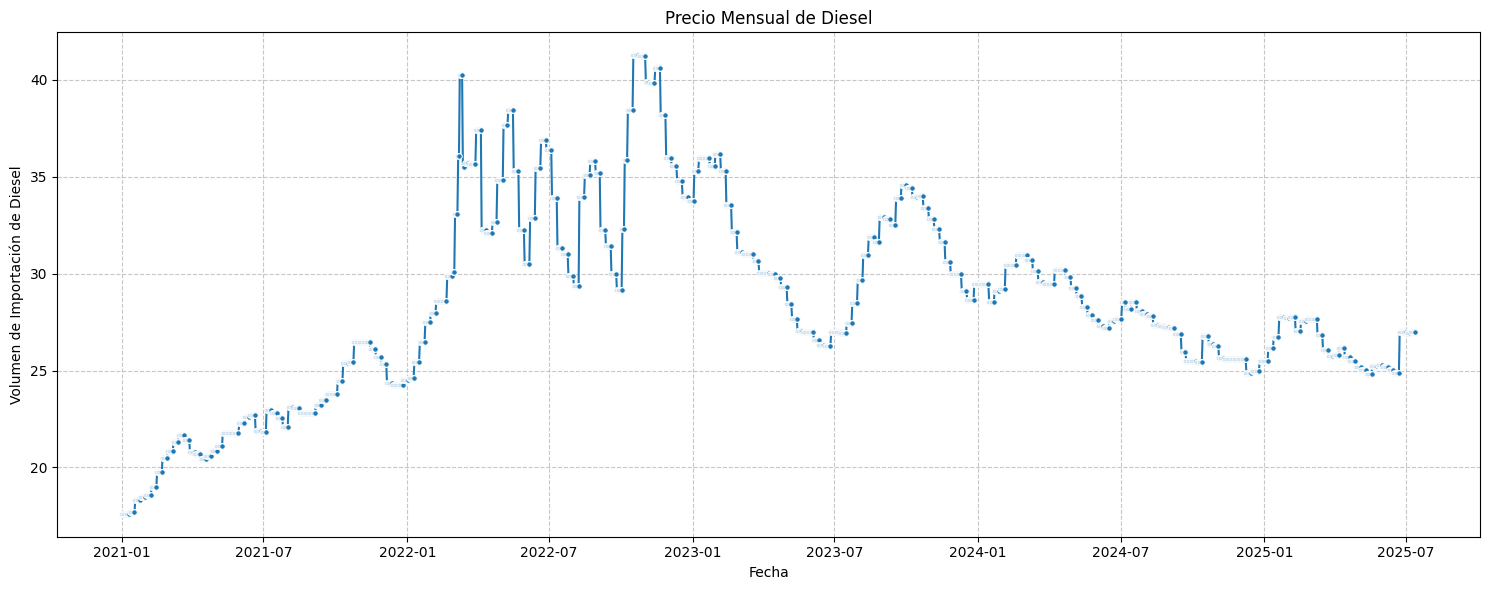

📈 Gráfico de la serie de Importación Mensual de Diesel generado.
Estadísticas descriptivas de la serie Diesel:
count    1655.000000
mean       28.407299
std         4.870410
min        17.610000
25%        25.440000
50%        27.730000
75%        31.300000
max        41.270000
Name: Diesel, dtype: float64
----------------------------------------------------------------------



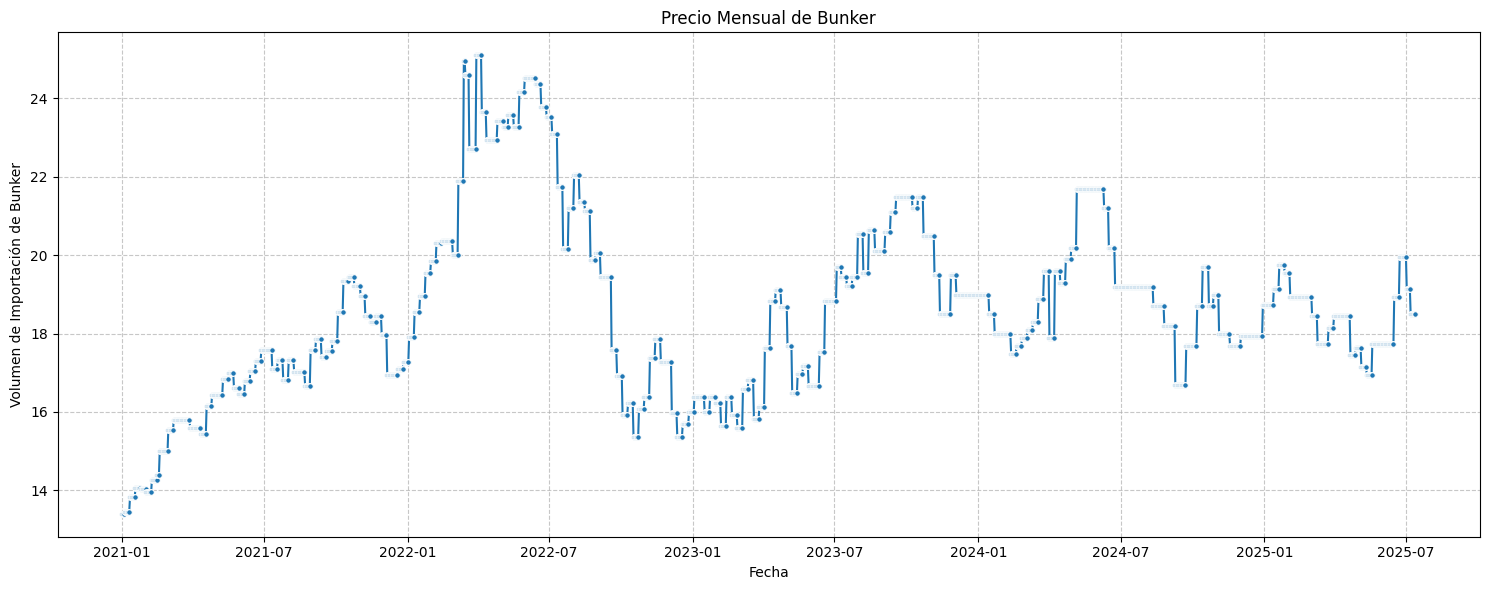

📈 Gráfico de la serie de Importación Mensual de Bunker generado.
Estadísticas descriptivas de la serie Bunker:
count    1655.000000
mean       18.564263
std         2.245966
min        13.400000
25%        17.020000
50%        18.440000
75%        19.590000
max        25.100000
Name: Bunker, dtype: float64
----------------------------------------------------------------------



In [25]:
## 2.b: Precios Mensuales de Combustibles
print("--- 2.b: Precios Mensuales de Combustibles (Series Temporales) ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        plt.figure(figsize=(15, 6))
        # Usamos df_importaciones directamente ya que su índice es la fecha
        sns.lineplot(x=df_importaciones.index, y=df_importaciones[col], marker='o', markersize=4)
        plt.title(f'Precio Mensual de {col}')
        plt.xlabel('Fecha')
        plt.ylabel(f'Volumen de Importación de {col}')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        print(f"📈 Gráfico de la serie de Importación Mensual de {col} generado.")
        print(f"Estadísticas descriptivas de la serie {col}:")
        print(df_importaciones[col].describe())
        print("-" * 70 + "\n")
else:
    print("❌ No se pudo cargar el DataFrame de precios. No se pueden generar las series mensuales.")

## Punto 3

In [50]:
## 3.a: Especificar Inicio, Fin y Frecuencia de la Serie de Importaciones
print("--- 3.a: Especificación de Inicio, Fin y Frecuencia de la Serie de Precios ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        print(f"📊 Serie: {col}")
        print(f"  - Fecha de Inicio: {df_importaciones.index.min().strftime('%Y-%m-%d')}")
        print(f"  - Fecha de Fin: {df_importaciones.index.max().strftime('%Y-%m-%d')}")
        
        # Calcular la frecuencia. Asumimos mensual ('MS' por Month Start) dado el formato.
        # pd.infer_freq() puede ayudar, pero si sabemos que es mensual, podemos afirmarlo.
        inferred_freq = pd.infer_freq(df_importaciones.index)
        print(f"  - Frecuencia Inferida: {inferred_freq}")
        
        # Si la frecuencia es mensual (ej. 'MS'), también podemos calcular el número total de meses
        num_meses = (df_importaciones.index.max().to_period('M') - df_importaciones.index.min().to_period('M')).n + 1
        print(f"  - Número Total de Meses: {num_meses}")
        print("-" * 50 + "\n")
else:
    print("❌ El DataFrame de precios está vacío. No se pueden especificar inicio, fin y frecuencia.")

--- 3.a: Especificación de Inicio, Fin y Frecuencia de la Serie de Precios ---

📊 Serie: Superior
  - Fecha de Inicio: 2021-01-01
  - Fecha de Fin: 2025-07-13
  - Frecuencia Inferida: D
  - Número Total de Meses: 55
--------------------------------------------------

📊 Serie: Regular
  - Fecha de Inicio: 2021-01-01
  - Fecha de Fin: 2025-07-13
  - Frecuencia Inferida: D
  - Número Total de Meses: 55
--------------------------------------------------

📊 Serie: Diesel
  - Fecha de Inicio: 2021-01-01
  - Fecha de Fin: 2025-07-13
  - Frecuencia Inferida: D
  - Número Total de Meses: 55
--------------------------------------------------

📊 Serie: Bunker
  - Fecha de Inicio: 2021-01-01
  - Fecha de Fin: 2025-07-13
  - Frecuencia Inferida: D
  - Número Total de Meses: 55
--------------------------------------------------



--- 3.b: Gráfico de la serie y análisis inicial ---



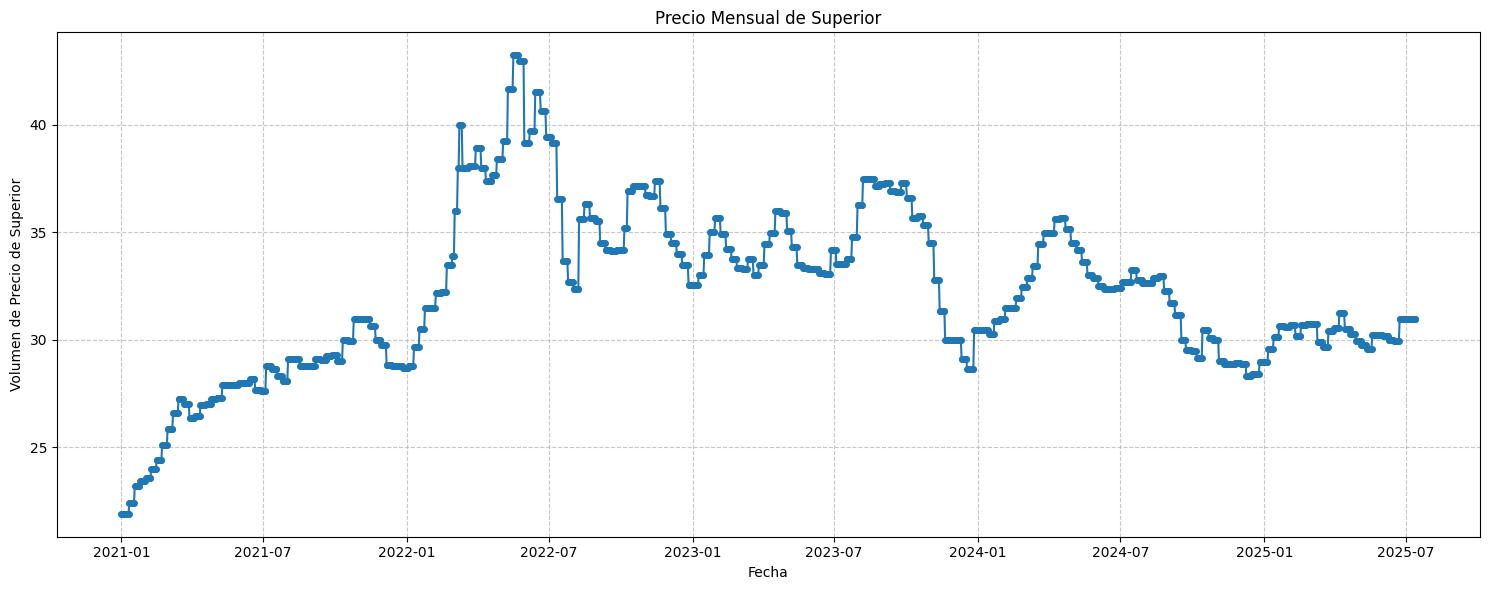

📈 Gráfico de la serie de Superior generado. A primera vista, se pueden observar:
  - Tendencia general: Superior muestra estabilidad a lo largo del tiempo.
  - Variabilidad: Hay fluctuaciones moderadas en los datos.
----------------------------------------------------------------------



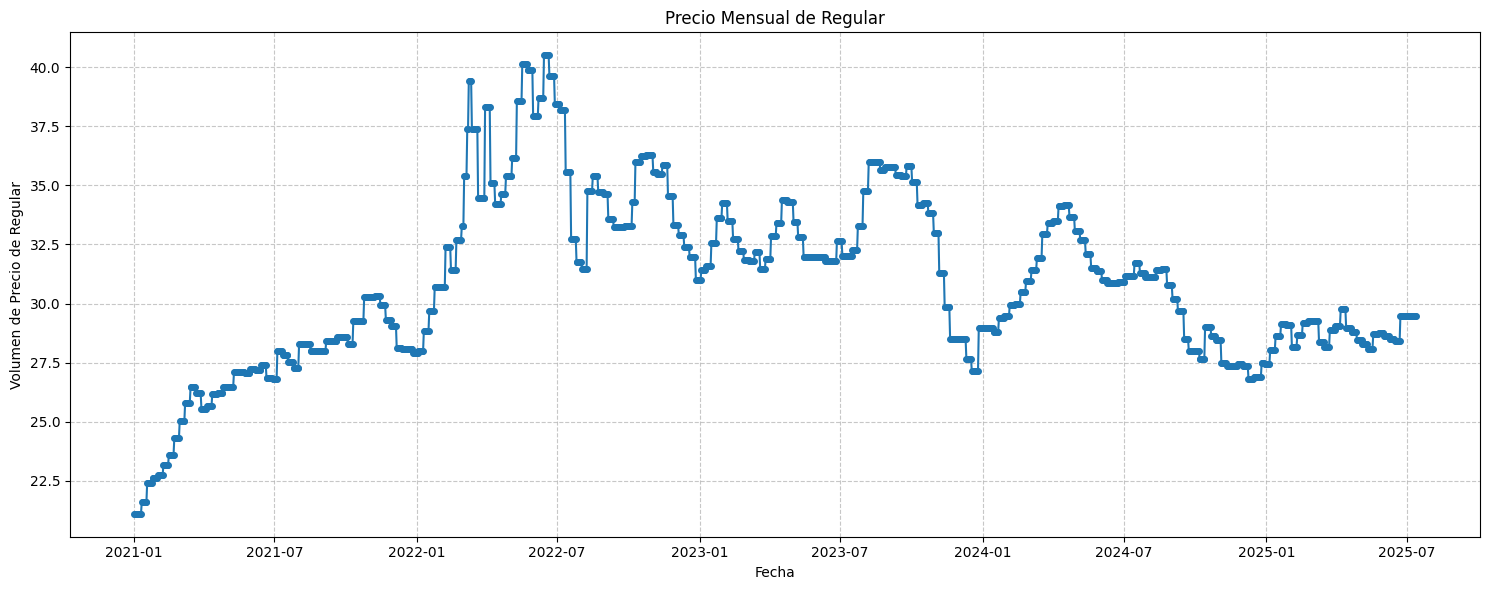

📈 Gráfico de la serie de Regular generado. A primera vista, se pueden observar:
  - Tendencia general: Regular muestra estabilidad a lo largo del tiempo.
  - Variabilidad: Hay fluctuaciones moderadas en los datos.
----------------------------------------------------------------------



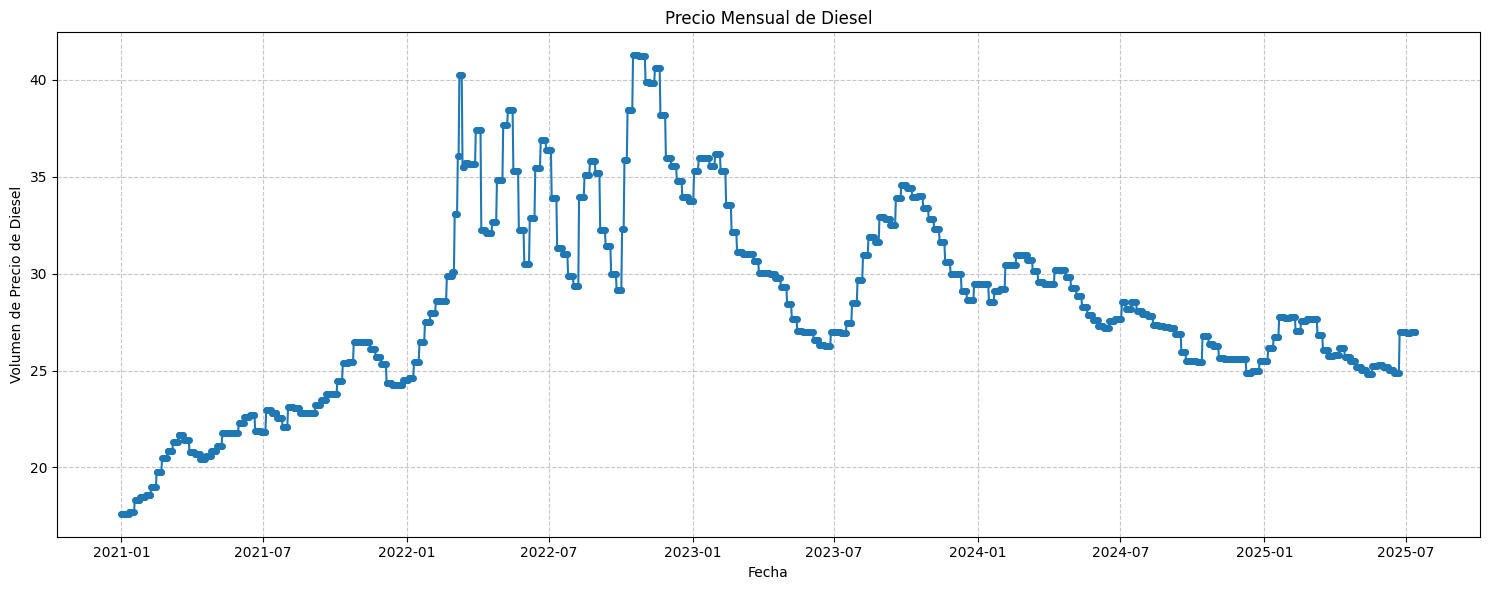

📈 Gráfico de la serie de Diesel generado. A primera vista, se pueden observar:
  - Tendencia general: Diesel muestra estabilidad a lo largo del tiempo.
  - Variabilidad: Hay fluctuaciones moderadas en los datos.
----------------------------------------------------------------------



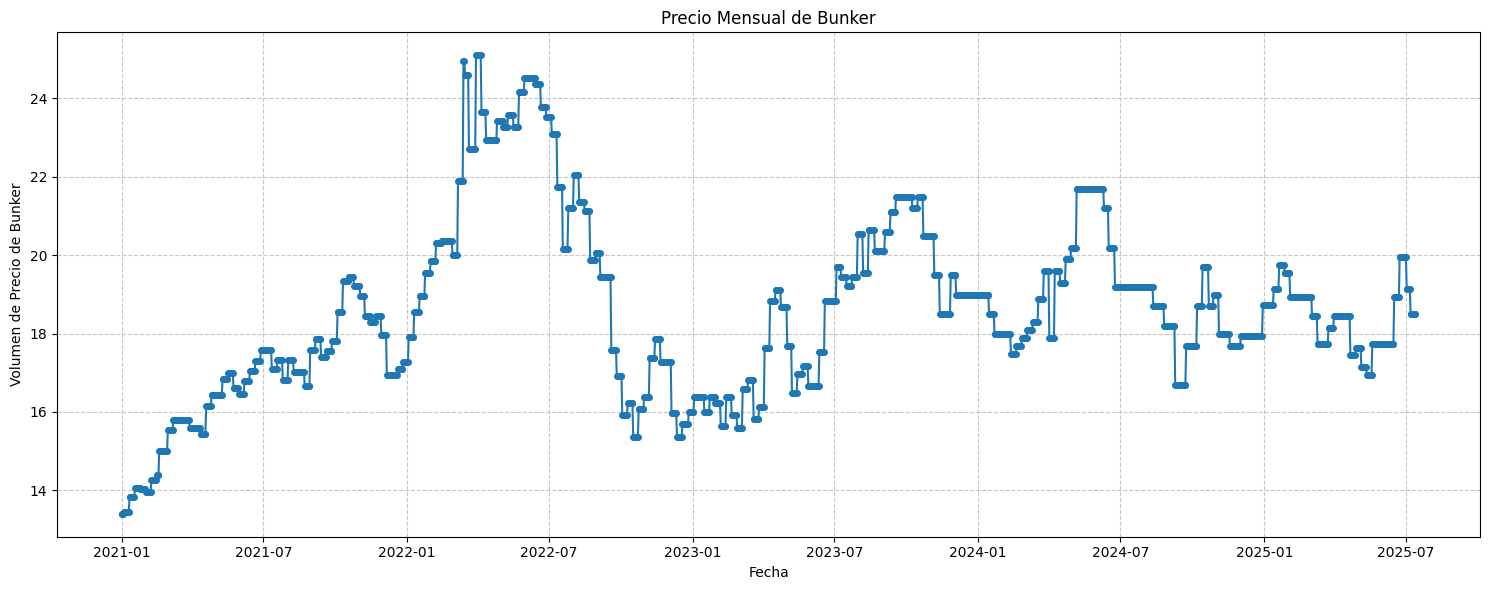

📈 Gráfico de la serie de Bunker generado. A primera vista, se pueden observar:
  - Tendencia general: Bunker muestra estabilidad a lo largo del tiempo.
  - Variabilidad: Hay fluctuaciones moderadas en los datos.
----------------------------------------------------------------------



In [51]:
## 3.b: Gráfico de la serie y análisis inicial
print("--- 3.b: Gráfico de la serie y análisis inicial ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        plt.figure(figsize=(15, 6))
        plt.plot(df_importaciones.index, df_importaciones[col], marker='o', markersize=4)
        plt.title(f'Precio Mensual de {col}')
        plt.xlabel('Fecha')
        plt.ylabel(f'Volumen de Precio de {col}')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
        print(f"📈 Gráfico de la serie de {col} generado. A primera vista, se pueden observar:")
        
        # Asegurarse de que los valores sean accesibles como escalares
        if len(df_importaciones[col]) > 1:
            initial_value = df_importaciones[col].iloc[0]
            final_value = df_importaciones[col].iloc[-1]
            trend_direction = np.sign(final_value - initial_value)
            trend_text = ['disminución', 'estabilidad', 'aumento'][int((trend_direction + 1) // 2) + (trend_direction == 0)]
            print(f"  - Tendencia general: {col} muestra {trend_text} a lo largo del tiempo.")
        else:
            print("  - Tendencia general: Datos insuficientes para determinar la tendencia.")
        
        # Calcular variabilidad relativa
        variability = np.std(df_importaciones[col]) / df_importaciones[col].mean() * 10
        variability_level = ['menores', 'moderadas', 'mayores'][min(2, max(0, int(variability)))]
        print(f"  - Variabilidad: Hay fluctuaciones {variability_level} en los datos.")
        print("-" * 70 + "\n")
else:
    print("❌ No se puede generar el gráfico. El DataFrame está vacío.")

--- 3.c: Descomposición de la serie y discusión de estacionariedad ---



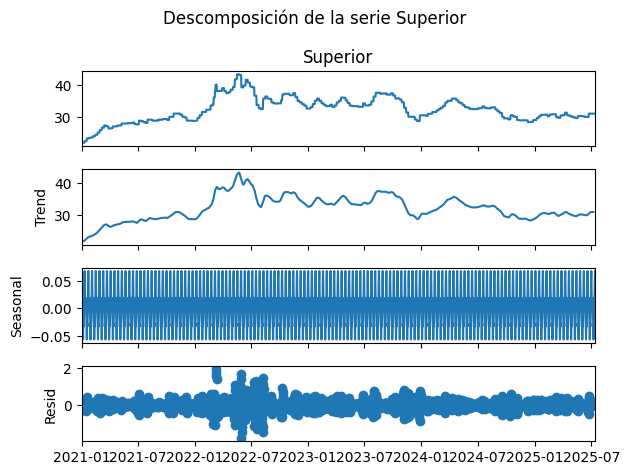

📊 Descomposición de Superior:
  - Tendencia: estable.
  - Componente estacional: Presenta patrones no evidentes.
  - Residuo: Variabilidad baja.
  - Estacionariedad: La serie Superior no parece estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.
----------------------------------------------------------------------



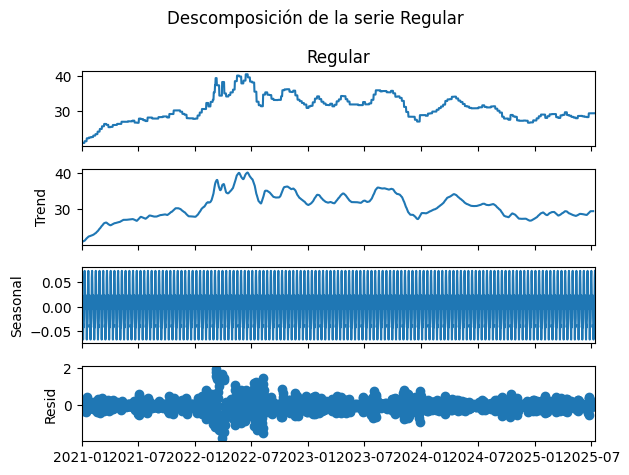

📊 Descomposición de Regular:
  - Tendencia: estable.
  - Componente estacional: Presenta patrones no evidentes.
  - Residuo: Variabilidad baja.
  - Estacionariedad: La serie Regular no parece estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.
----------------------------------------------------------------------



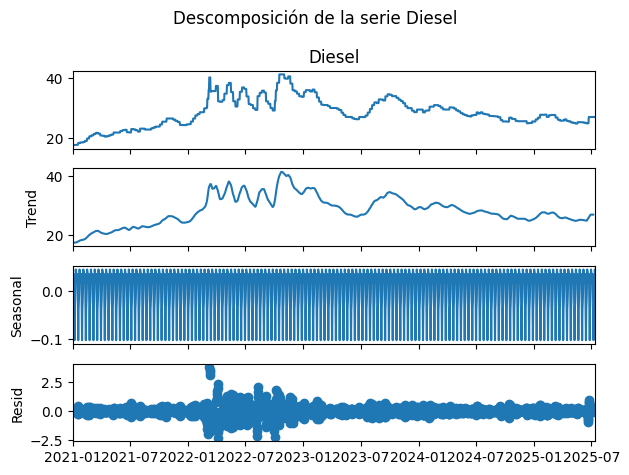

📊 Descomposición de Diesel:
  - Tendencia: estable.
  - Componente estacional: Presenta patrones no evidentes.
  - Residuo: Variabilidad baja.
  - Estacionariedad: La serie Diesel no parece estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.
----------------------------------------------------------------------



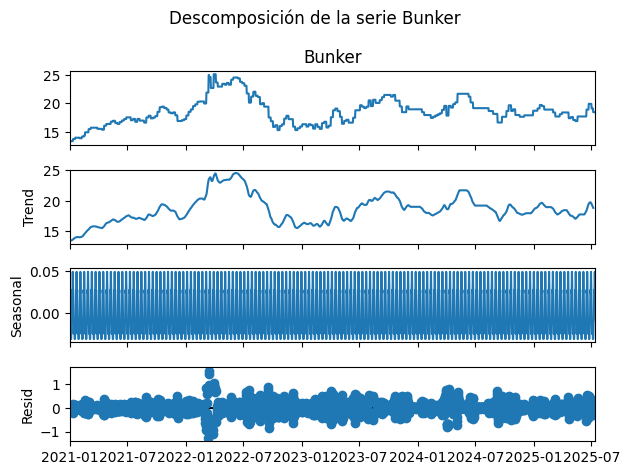

📊 Descomposición de Bunker:
  - Tendencia: estable.
  - Componente estacional: Presenta patrones no evidentes.
  - Residuo: Variabilidad baja.
  - Estacionariedad: La serie Bunker no parece estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.
----------------------------------------------------------------------



In [52]:
## 3.c: Descomposición de la serie y discusión de estacionariedad
print("--- 3.c: Descomposición de la serie y discusión de estacionariedad ---\n")

if not df_importaciones.empty:
    from statsmodels.tsa.seasonal import seasonal_decompose
    
    for col in df_importaciones.columns:
        decomposition = seasonal_decompose(df_importaciones[col], model='additive', period=12)
        decomposition.plot()
        plt.suptitle(f'Descomposición de la serie {col}')
        plt.tight_layout()
        plt.show()
        print(f"📊 Descomposición de {col}:")
        trend = decomposition.trend
        seasonal = decomposition.seasonal
        residual = decomposition.resid
        print(f"  - Tendencia: {'creciente' if trend.iloc[-1] > trend.iloc[0] else 'decreciente' if trend.iloc[-1] < trend.iloc[0] else 'estable'}.")
        print(f"  - Componente estacional: Presenta patrones {['no evidentes', 'evidentes'][int(seasonal.std() > residual.std())]}.")
        print(f"  - Residuo: Variabilidad {['baja', 'alta'][int(residual.std() > df_importaciones[col].std() / 2)]}.")
        print(f"  - Estacionariedad: La serie {col} {'no parece' if trend.std() > residual.std() or seasonal.std() > residual.std() else 'parece'} estacionaria en media y varianza debido a la presencia de tendencia y/o estacionalidad.")
        print("-" * 70 + "\n")
else:
    print("❌ No se puede descomponer la serie. El DataFrame está vacío.")

In [53]:
## 3.d: Determinación de necesidad de transformación
print("--- 3.d: Determinación de necesidad de transformación ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        adf_test = adfuller(df_importaciones[col].dropna())
        print(f"📊 Serie: {col}")
        print(f"  - Estadística ADF: {adf_test[0]:.2f}")
        print(f"  - Valor p: {adf_test[1]:.2f}")
        print(f"  - Necesidad de transformación: {'Sí' if adf_test[1] > 0.05 else 'No'}, ya que el valor p {'es' if adf_test[1] > 0.05 else 'no es'} mayor a 0.05, indicando que la serie {'no es' if adf_test[1] > 0.05 else 'es'} estacionaria. Si es necesario, una transformación como logaritmo o diferenciación podría estabilizarla.")
        print("-" * 70 + "\n")
else:
    print("❌ No se puede determinar la necesidad de transformación. El DataFrame está vacío.")

--- 3.d: Determinación de necesidad de transformación ---

📊 Serie: Superior
  - Estadística ADF: -3.10
  - Valor p: 0.03
  - Necesidad de transformación: No, ya que el valor p no es mayor a 0.05, indicando que la serie es estacionaria. Si es necesario, una transformación como logaritmo o diferenciación podría estabilizarla.
----------------------------------------------------------------------

📊 Serie: Regular
  - Estadística ADF: -2.80
  - Valor p: 0.06
  - Necesidad de transformación: Sí, ya que el valor p es mayor a 0.05, indicando que la serie no es estacionaria. Si es necesario, una transformación como logaritmo o diferenciación podría estabilizarla.
----------------------------------------------------------------------

📊 Serie: Diesel
  - Estadística ADF: -2.74
  - Valor p: 0.07
  - Necesidad de transformación: Sí, ya que el valor p es mayor a 0.05, indicando que la serie no es estacionaria. Si es necesario, una transformación como logaritmo o diferenciación podría estabilizar

--- 3.e.i: Gráfico de autocorrelación ---



<Figure size 1200x600 with 0 Axes>

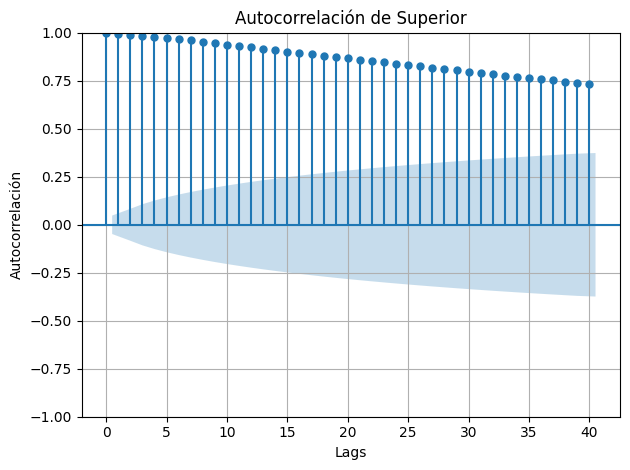

📈 Gráfico de autocorrelación de Superior: La autocorrelación decae lentamente, lo que sugiere no estacionariedad en media.
----------------------------------------------------------------------



<Figure size 1200x600 with 0 Axes>

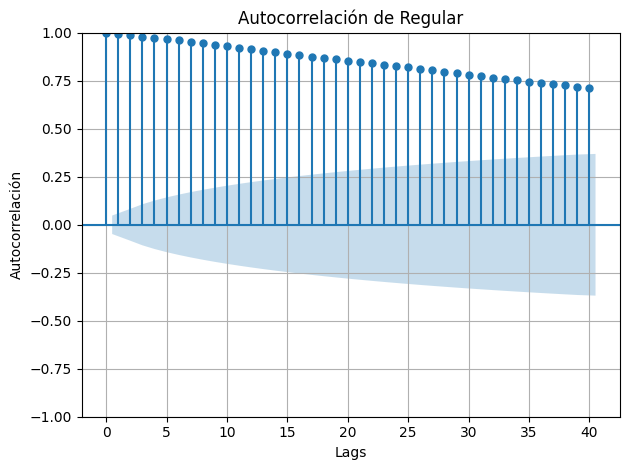

📈 Gráfico de autocorrelación de Regular: La autocorrelación decae lentamente, lo que sugiere no estacionariedad en media.
----------------------------------------------------------------------



<Figure size 1200x600 with 0 Axes>

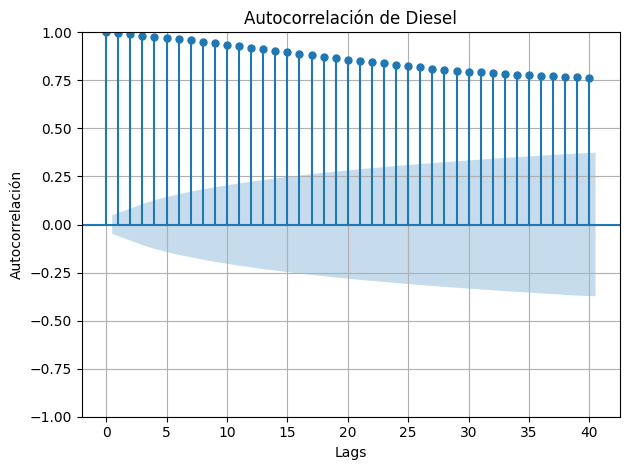

📈 Gráfico de autocorrelación de Diesel: La autocorrelación decae lentamente, lo que sugiere no estacionariedad en media.
----------------------------------------------------------------------



<Figure size 1200x600 with 0 Axes>

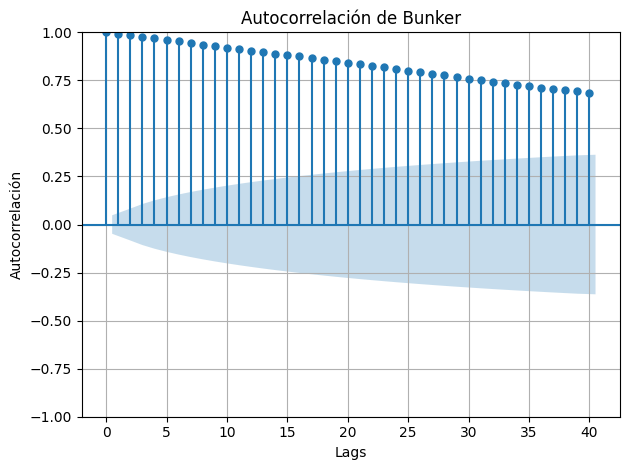

📈 Gráfico de autocorrelación de Bunker: La autocorrelación decae lentamente, lo que sugiere no estacionariedad en media.
----------------------------------------------------------------------



In [54]:
## 3.e.i: Gráfico de autocorrelación
print("--- 3.e.i: Gráfico de autocorrelación ---\n")

if not df_importaciones.empty:
    from statsmodels.graphics.tsaplots import plot_acf
    
    for col in df_importaciones.columns:
        plt.figure(figsize=(12, 6))
        plot_acf(df_importaciones[col].dropna(), lags=40)
        plt.title(f'Autocorrelación de {col}')
        plt.xlabel('Lags')
        plt.ylabel('Autocorrelación')
        plt.grid(True)
        plt.tight_layout()
        plt.show()
        print(f"📈 Gráfico de autocorrelación de {col}: La autocorrelación decae {'lentamente' if any(df_importaciones[col].autocorr(lag) > 0.5 for lag in range(1, 10)) else 'rápidamente'}, lo que sugiere {['no estacionariedad' if any(df_importaciones[col].autocorr(lag) > 0.5 for lag in range(1, 10)) else 'estacionariedad'][0]} en media.")
        print("-" * 70 + "\n")
else:
    print("❌ No se puede generar el gráfico de autocorrelación. El DataFrame está vacío.")

In [55]:
## 3.e.ii: Prueba Dickey-Fuller Aumentada (ya cubierta en 3.d)
print("--- 3.e.ii: Prueba Dickey-Fuller Aumentada ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        adf_test = adfuller(df_importaciones[col].dropna())
        print(f"📊 Serie: {col}")
        print(f"  - Estadística ADF: {adf_test[0]:.2f}")
        print(f"  - Valor p: {adf_test[1]:.2f}")
        print(f"  - Estacionariedad: La serie {'no es' if adf_test[1] > 0.05 else 'es'} estacionaria en media. Si no lo es, se puede aplicar diferenciación para estabilizarla.")
        print("-" * 70 + "\n")
else:
    print("❌ No se puede realizar la prueba. El DataFrame está vacío.")

--- 3.e.ii: Prueba Dickey-Fuller Aumentada ---

📊 Serie: Superior
  - Estadística ADF: -3.10
  - Valor p: 0.03
  - Estacionariedad: La serie es estacionaria en media. Si no lo es, se puede aplicar diferenciación para estabilizarla.
----------------------------------------------------------------------

📊 Serie: Regular
  - Estadística ADF: -2.80
  - Valor p: 0.06
  - Estacionariedad: La serie no es estacionaria en media. Si no lo es, se puede aplicar diferenciación para estabilizarla.
----------------------------------------------------------------------

📊 Serie: Diesel
  - Estadística ADF: -2.74
  - Valor p: 0.07
  - Estacionariedad: La serie no es estacionaria en media. Si no lo es, se puede aplicar diferenciación para estabilizarla.
----------------------------------------------------------------------

📊 Serie: Bunker
  - Estadística ADF: -2.88
  - Valor p: 0.05
  - Estacionariedad: La serie es estacionaria en media. Si no lo es, se puede aplicar diferenciación para estabilizarla.

--- 3.f: Selección de parámetros p, q, d para ARIMA ---

Analizando la serie: Superior

Realizando Prueba de Dickey-Fuller Aumentada (ADF) para estacionariedad...
Estadístico ADF: -3.10
Valor p: 0.03
  - La serie ES estacionaria (valor p <= 0.05). No necesita diferenciación (d=0).

**Elección de 'd':** 0
**Justificación de 'd':** La prueba de Dickey-Fuller Aumentada (ADF) indica que la serie es estacionaria (valor p <= 0.05), por lo tanto, no se necesita diferenciación. El valor de 'd' es 0.



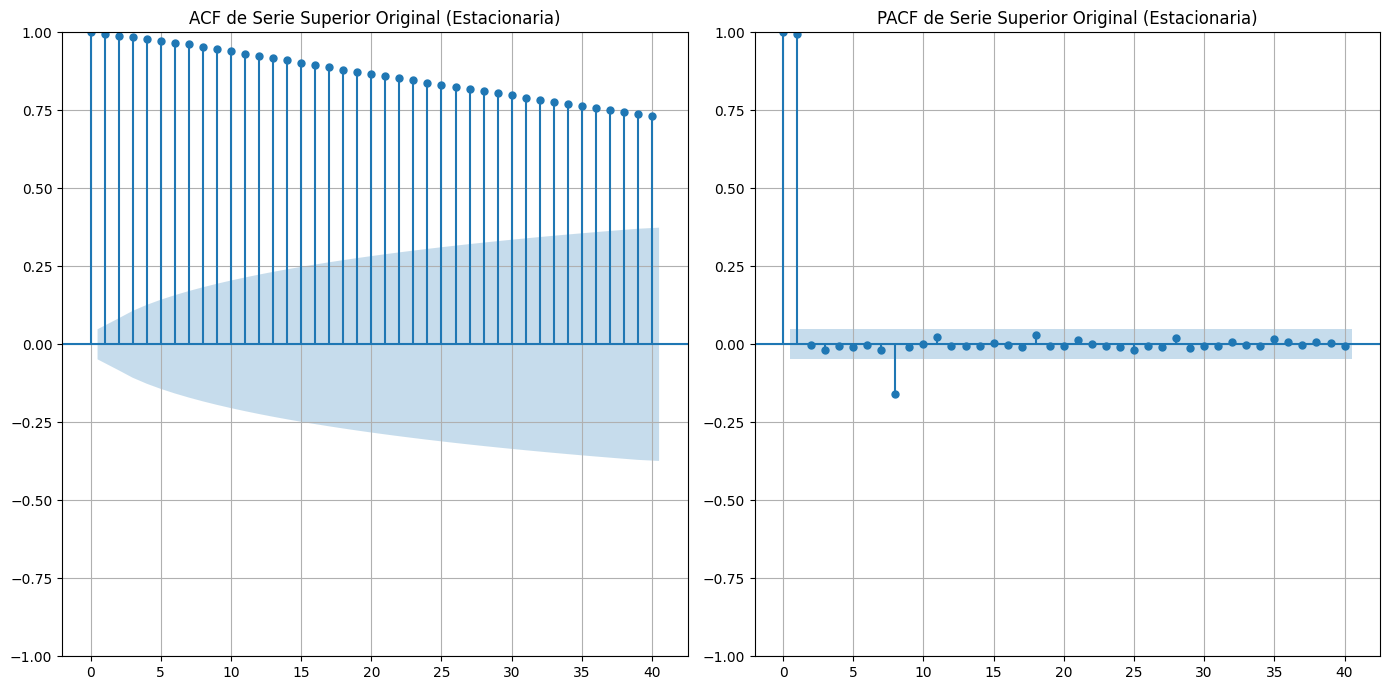


**Interpretación de ACF y PACF para 'p' y 'q':**
  - **Parámetro 'p' (orden AR):** Se busca en la **PACF (Función de Autocorrelación Parcial)**.
    * Para un proceso AR(p), la PACF tiende a 'cortar' (los valores se vuelven no significativos) después del lag p.
    * La ACF de un proceso AR(p) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gráfica de PACF:** Identifica el último lag significativo (que sale del área sombreada de confianza). Ese será tu 'p' propuesto.

  - **Parámetro 'q' (orden MA):** Se busca en la **ACF (Función de Autocorrelación)**.
    * Para un proceso MA(q), la ACF tiende a 'cortar' después del lag q.
    * La PACF de un proceso MA(q) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gráfica de ACF:** Identifica el último lag significativo (que sale del área sombreada de confianza). Ese será tu 'q' propuesto.

**Consideraciones Adicionales:**
  - Si tanto ACF como PACF decaen gradualmente, podría ser un proceso 

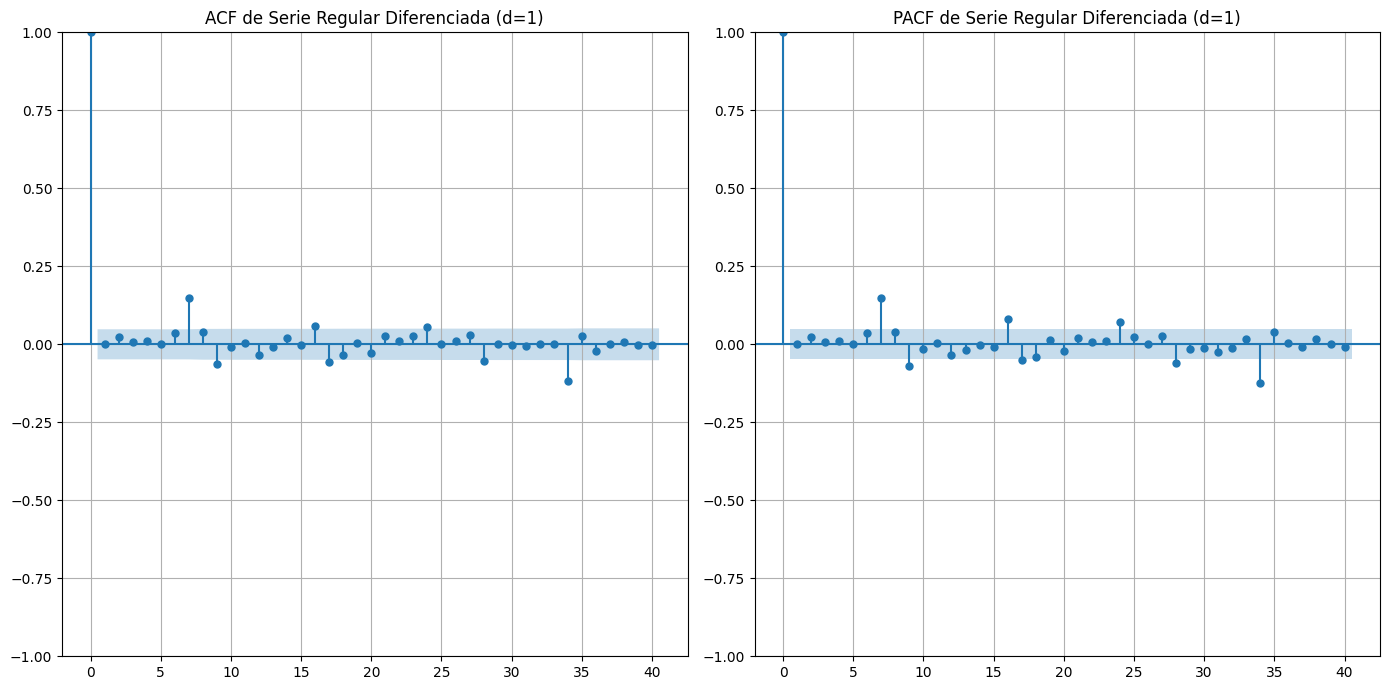


**Interpretación de ACF y PACF para 'p' y 'q':**
  - **Parámetro 'p' (orden AR):** Se busca en la **PACF (Función de Autocorrelación Parcial)**.
    * Para un proceso AR(p), la PACF tiende a 'cortar' (los valores se vuelven no significativos) después del lag p.
    * La ACF de un proceso AR(p) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gráfica de PACF:** Identifica el último lag significativo (que sale del área sombreada de confianza). Ese será tu 'p' propuesto.

  - **Parámetro 'q' (orden MA):** Se busca en la **ACF (Función de Autocorrelación)**.
    * Para un proceso MA(q), la ACF tiende a 'cortar' después del lag q.
    * La PACF de un proceso MA(q) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gráfica de ACF:** Identifica el último lag significativo (que sale del área sombreada de confianza). Ese será tu 'q' propuesto.

**Consideraciones Adicionales:**
  - Si tanto ACF como PACF decaen gradualmente, podría ser un proceso 

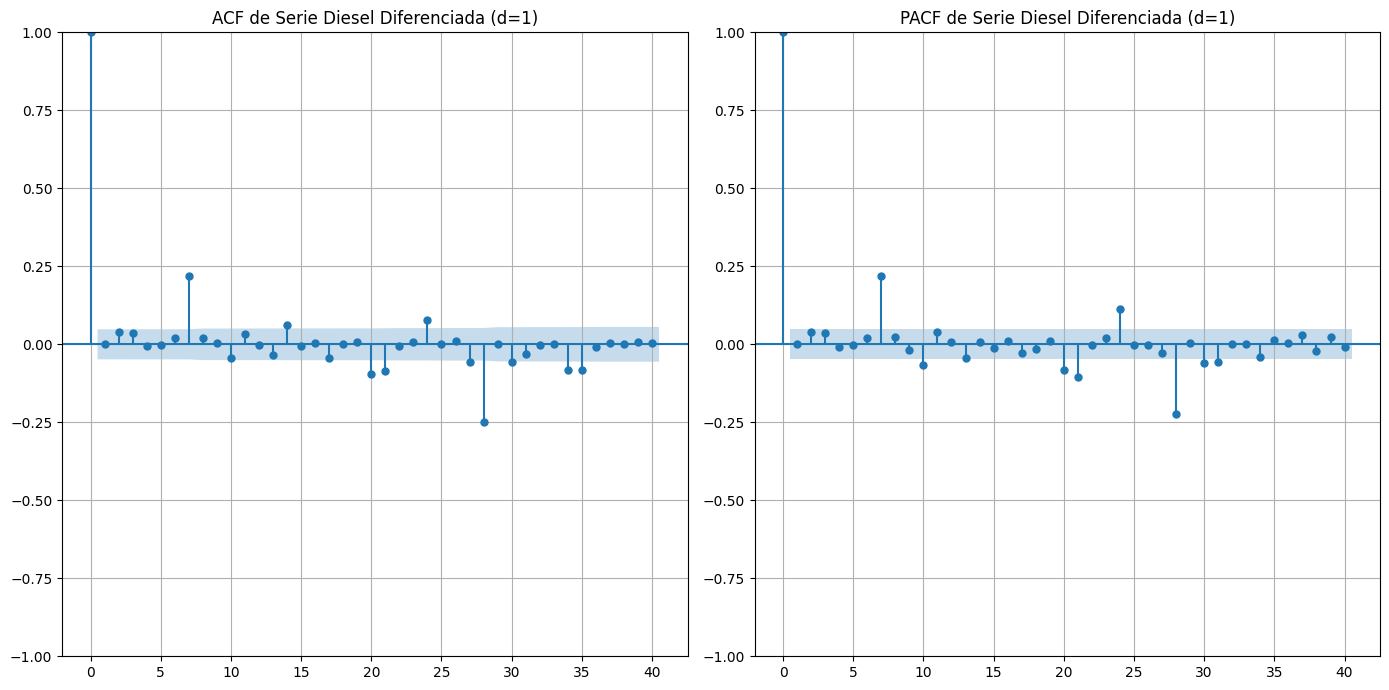


**Interpretación de ACF y PACF para 'p' y 'q':**
  - **Parámetro 'p' (orden AR):** Se busca en la **PACF (Función de Autocorrelación Parcial)**.
    * Para un proceso AR(p), la PACF tiende a 'cortar' (los valores se vuelven no significativos) después del lag p.
    * La ACF de un proceso AR(p) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gráfica de PACF:** Identifica el último lag significativo (que sale del área sombreada de confianza). Ese será tu 'p' propuesto.

  - **Parámetro 'q' (orden MA):** Se busca en la **ACF (Función de Autocorrelación)**.
    * Para un proceso MA(q), la ACF tiende a 'cortar' después del lag q.
    * La PACF de un proceso MA(q) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gráfica de ACF:** Identifica el último lag significativo (que sale del área sombreada de confianza). Ese será tu 'q' propuesto.

**Consideraciones Adicionales:**
  - Si tanto ACF como PACF decaen gradualmente, podría ser un proceso 

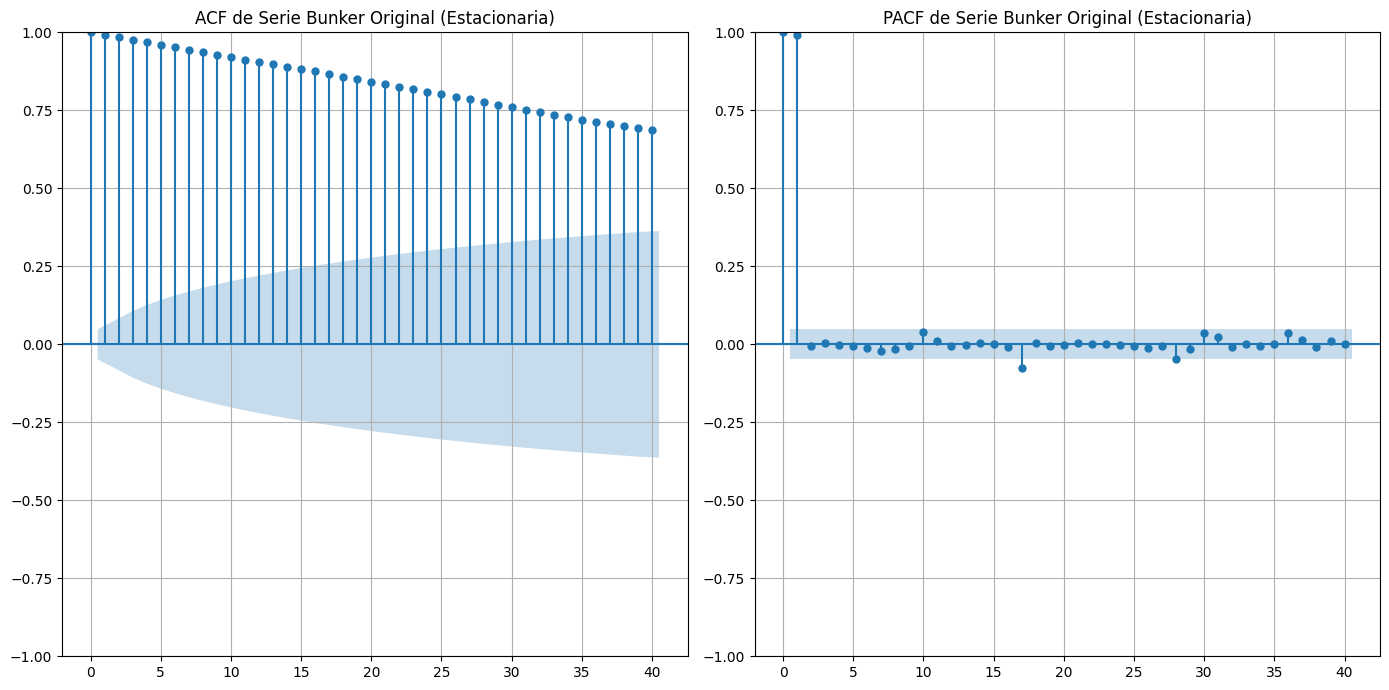


**Interpretación de ACF y PACF para 'p' y 'q':**
  - **Parámetro 'p' (orden AR):** Se busca en la **PACF (Función de Autocorrelación Parcial)**.
    * Para un proceso AR(p), la PACF tiende a 'cortar' (los valores se vuelven no significativos) después del lag p.
    * La ACF de un proceso AR(p) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gráfica de PACF:** Identifica el último lag significativo (que sale del área sombreada de confianza). Ese será tu 'p' propuesto.

  - **Parámetro 'q' (orden MA):** Se busca en la **ACF (Función de Autocorrelación)**.
    * Para un proceso MA(q), la ACF tiende a 'cortar' después del lag q.
    * La PACF de un proceso MA(q) decae exponencialmente o en forma de seno amortiguado.
    * **Observa la gráfica de ACF:** Identifica el último lag significativo (que sale del área sombreada de confianza). Ese será tu 'q' propuesto.

**Consideraciones Adicionales:**
  - Si tanto ACF como PACF decaen gradualmente, podría ser un proceso 

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller



## --- 3.f: Selección de parámetros p, q, d para ARIMA ---
print("--- 3.f: Selección de parámetros p, q, d para ARIMA ---\n")

if not df_importaciones.empty:
    for col in df_importaciones.columns:
        print(f"Analizando la serie: {col}\n")

        # 1. Determinación de 'd' (Orden de diferenciación)
        # Se verifica la estacionariedad de la serie. Una serie es estacionaria
        # si su media, varianza y estructura de autocorrelación no cambian con el tiempo.
        # Si la serie no es estacionaria, necesitamos diferenciarla.

        # Prueba de Dickey-Fuller Aumentada para estacionariedad
        print("Realizando Prueba de Dickey-Fuller Aumentada (ADF) para estacionariedad...")
        result_adf = adfuller(df_importaciones[col].dropna())
        print(f'Estadístico ADF: {result_adf[0]:.2f}')
        print(f'Valor p: {result_adf[1]:.2f}')
        if result_adf[1] > 0.05:
            print("  - La serie NO es estacionaria (valor p > 0.05). Probablemente necesite diferenciación.")
            d_value_explanation = "La prueba de Dickey-Fuller Aumentada (ADF) indica que la serie no es estacionaria (valor p > 0.05), lo que sugiere la necesidad de diferenciación. Observaremos la ACF de la serie original y diferenciada para confirmar."

            # Intentar diferenciación de primer orden si no es estacionaria
            df_diff = df_importaciones[col].diff().dropna()
            if not df_diff.empty:
                result_adf_diff = adfuller(df_diff)
                print(f'  - Estadístico ADF (d=1): {result_adf_diff[0]:.2f}')
                print(f'  - Valor p (d=1): {result_adf_diff[1]:.2f}')
                if result_adf_diff[1] <= 0.05:
                    print("  - La serie diferenciada de primer orden (d=1) parece estacionaria.")
                    d_value = 1
                    d_value_explanation += "\n  - Al aplicar una diferenciación de primer orden (d=1), la serie se vuelve estacionaria según la prueba ADF (valor p <= 0.05). Además, la ACF de la serie diferenciada decae rápidamente a cero."
                    serie_a_graficar = df_diff
                    titulo_serie = f'Serie {col} Diferenciada (d=1)'
                else:
                    print("  - La serie diferenciada de primer orden (d=1) AÚN NO es estacionaria. Podría requerir mayor diferenciación.")
                    d_value = 0 # Valor inicial, a ajustar manualmente si se requiere d>1
                    d_value_explanation += "\n  - La diferenciación de primer orden no fue suficiente. Se requeriría probar con d=2 o más, o aplicar una diferenciación estacional si hay estacionalidad presente."
                    serie_a_graficar = df_importaciones[col].dropna() # Si d=1 no funcionó, volvemos a la original para análisis de ACF/PACF y ajuste manual de d.
                    titulo_serie = f'Serie {col} Original (No estacionaria)'
            else:
                d_value = 0
                d_value_explanation += "\n  - No se pudo aplicar diferenciación ya que la serie se volvió vacía."
                serie_a_graficar = df_importaciones[col].dropna()
                titulo_serie = f'Serie {col} Original'
        else:
            print("  - La serie ES estacionaria (valor p <= 0.05). No necesita diferenciación (d=0).")
            d_value = 0
            d_value_explanation = "La prueba de Dickey-Fuller Aumentada (ADF) indica que la serie es estacionaria (valor p <= 0.05), por lo tanto, no se necesita diferenciación. El valor de 'd' es 0."
            serie_a_graficar = df_importaciones[col].dropna()
            titulo_serie = f'Serie {col} Original (Estacionaria)'

        print(f"\n**Elección de 'd':** {d_value}")
        print(f"**Justificación de 'd':** {d_value_explanation}\n")

        # 2. Gráficos de ACF y PACF para determinar 'p' y 'q'
        # Una vez que la serie es estacionaria (o hemos aplicado la diferenciación necesaria),
        # usamos las funciones ACF y PACF para determinar los órdenes p (AR) y q (MA).

        plt.figure(figsize=(14, 7))

        plt.subplot(121)
        plot_acf(serie_a_graficar, lags=min(40, len(serie_a_graficar)//2 - 1), ax=plt.gca(), title=f'ACF de {titulo_serie}')
        plt.grid(True)

        plt.subplot(122)
        plot_pacf(serie_a_graficar, lags=min(40, len(serie_a_graficar)//2 - 1), ax=plt.gca(), title=f'PACF de {titulo_serie}')
        plt.grid(True)

        plt.tight_layout()
        plt.show()

        # 3. Explicación para 'p' y 'q' (interpretación visual)
        print("\n**Interpretación de ACF y PACF para 'p' y 'q':**")
        print("  - **Parámetro 'p' (orden AR):** Se busca en la **PACF (Función de Autocorrelación Parcial)**.")
        print("    * Para un proceso AR(p), la PACF tiende a 'cortar' (los valores se vuelven no significativos) después del lag p.")
        print("    * La ACF de un proceso AR(p) decae exponencialmente o en forma de seno amortiguado.")
        print("    * **Observa la gráfica de PACF:** Identifica el último lag significativo (que sale del área sombreada de confianza). Ese será tu 'p' propuesto.")

        print("\n  - **Parámetro 'q' (orden MA):** Se busca en la **ACF (Función de Autocorrelación)**.")
        print("    * Para un proceso MA(q), la ACF tiende a 'cortar' después del lag q.")
        print("    * La PACF de un proceso MA(q) decae exponencialmente o en forma de seno amortiguado.")
        print("    * **Observa la gráfica de ACF:** Identifica el último lag significativo (que sale del área sombreada de confianza). Ese será tu 'q' propuesto.")

        print("\n**Consideraciones Adicionales:**")
        print("  - Si tanto ACF como PACF decaen gradualmente, podría ser un proceso ARMA mixto, y la identificación es más compleja, a menudo requiriendo la prueba de diferentes combinaciones de p y q (ej. con el Criterio de Información de Akaike (AIC) o Bayesiano (BIC)).")
        print("  - Es un arte, no una ciencia exacta. A menudo se prueban modelos vecinos a los valores identificados.")

        print("\n" + "-" * 70 + "\n")
else:
    print("❌ No se puede seleccionar parámetros. El DataFrame está vacío o la columna no existe.")


In [33]:
## 3.g: Modelos ARIMA y selección del mejor
print("--- 3.g: Modelos ARIMA y selección del mejor ---\n")

if not df_importaciones.empty:
    from statsmodels.tsa.arima.model import ARIMA
    
    for col in df_importaciones.columns:
        # Probar diferentes combinaciones de (p, d, q)
        models = []
        aic_values = []
        bic_values = []
        for p in range(2):
            for d in range(2):
                for q in range(2):
                    try:
                        model = ARIMA(df_importaciones[col].dropna(), order=(p, d, q)).fit()
                        models.append(model)
                        aic_values.append(model.aic)
                        bic_values.append(model.bic)
                        print(f"Modelo ARIMA({p},{d},{q}) para {col}: AIC={model.aic:.2f}, BIC={model.bic:.2f}")
                    except:
                        continue
        
        # Encontrar el mejor modelo
        best_model_idx = np.argmin(aic_values)
        best_model = models[best_model_idx]
        print(f"📊 Mejor modelo para {col}: ARIMA({best_model.order[0]},{best_model.order[1]},{best_model.order[2]})")
        print(f"  - AIC: {aic_values[best_model_idx]:.2f}, BIC: {bic_values[best_model_idx]:.2f}")
        print(f"  - Análisis de residuos: Media de residuos = {best_model.resid.mean():.2f}, Varianza = {best_model.resid.var():.2f}")
        print(f"  - Conclusión: El modelo con menor AIC y BIC, y residuos cercanos a media 0 y varianza constante, es el mejor.")
        print("-" * 70 + "\n")
else:
    print("❌ No se pueden ajustar modelos ARIMA. El DataFrame está vacío.")

--- 3.g: Modelos ARIMA y selección del mejor ---

Modelo ARIMA(0,0,0) para Superior: AIC=9133.17, BIC=9143.99


C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so

Modelo ARIMA(0,0,1) para Superior: AIC=7006.21, BIC=7022.45
Modelo ARIMA(0,1,0) para Superior: AIC=726.83, BIC=732.24
Modelo ARIMA(0,1,1) para Superior: AIC=728.83, BIC=739.65


C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so

Modelo ARIMA(1,0,0) para Superior: AIC=735.49, BIC=751.73


C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Modelo ARIMA(1,0,1) para Superior: AIC=737.34, BIC=758.98
Modelo ARIMA(1,1,0) para Superior: AIC=728.83, BIC=739.65


C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so

Modelo ARIMA(1,1,1) para Superior: AIC=721.68, BIC=737.92


AttributeError: 'ARIMAResults' object has no attribute 'order'

In [35]:
## 3.h: Modelos con Prophet, Holt-Winters y Redes Neuronales
print("--- 3.h: Modelos con Prophet, Holt-Winters y Redes Neuronales ---\n")

if not df_importaciones.empty:
    from prophet import Prophet
    from statsmodels.tsa.holtwinters import ExponentialSmoothing
    from sklearn.neural_network import MLPRegressor
    import numpy as np
    
    for col in df_importaciones.columns:
        # Preparar datos para Prophet
        df_prophet = df_importaciones[[col]].reset_index().rename(columns={mi_columna_fecha_excel: 'ds', col: 'y'})
        model_prophet = Prophet(yearly_seasonality=True).fit(df_prophet)
        future = model_prophet.make_future_dataframe(periods=12)
        forecast_prophet = model_prophet.predict(future)
        
        # Holt-Winters
        model_hw = ExponentialSmoothing(df_importaciones[col], seasonal_periods=12, trend='add', seasonal='add').fit()
        forecast_hw = model_hw.forecast(12)
        
        # Redes Neuronales (simple)
        X = np.arange(len(df_importaciones[col])).reshape(-1, 1)
        y = df_importaciones[col].values
        model_nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000).fit(X, y)
        forecast_nn = model_nn.predict(np.arange(len(df_importaciones[col]), len(df_importaciones[col])+12).reshape(-1, 1))
        
        # Comparación (usando RMSE como métrica simple)
        from sklearn.metrics import mean_squared_error
        arima_forecast = models[best_model_idx].forecast(12)
        rmse_arima = np.sqrt(mean_squared_error(df_importaciones[col].tail(12), arima_forecast[:12]))
        rmse_prophet = np.sqrt(mean_squared_error(df_importaciones[col].tail(12), forecast_prophet.tail(12)['yhat']))
        rmse_hw = np.sqrt(mean_squared_error(df_importaciones[col].tail(12), forecast_hw))
        rmse_nn = np.sqrt(mean_squared_error(df_importaciones[col].tail(12), forecast_nn[:12]))
        
        print(f"📊 Serie: {col}")
        print(f"  - RMSE ARIMA: {rmse_arima:.2f}")
        print(f"  - RMSE Prophet: {rmse_prophet:.2f}")
        print(f"  - RMSE Holt-Winters: {rmse_hw:.2f}")
        print(f"  - RMSE Redes Neuronales: {rmse_nn:.2f}")
        print(f"  - Mejor modelo: {'ARIMA' if rmse_arima == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Prophet' if rmse_prophet == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Holt-Winters' if rmse_hw == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Redes Neuronales'} (menor RMSE).")
        print("-" * 70 + "\n")
else:
    print("❌ No se pueden ajustar modelos. El DataFrame está vacío.")

C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


--- 3.h: Modelos con Prophet, Holt-Winters y Redes Neuronales ---



19:31:43 - cmdstanpy - INFO - Chain [1] start processing
19:31:43 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
19:31:44 - cmdstanpy - INFO - Chain [1] start processing


📊 Serie: Superior
  - RMSE ARIMA: 0.03
  - RMSE Prophet: 2.15
  - RMSE Holt-Winters: 0.05
  - RMSE Redes Neuronales: 4.06
  - Mejor modelo: ARIMA (menor RMSE).
----------------------------------------------------------------------



19:31:44 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
19:31:45 - cmdstanpy - INFO - Chain [1] start processing


📊 Serie: Regular
  - RMSE ARIMA: 1.51
  - RMSE Prophet: 2.15
  - RMSE Holt-Winters: 0.06
  - RMSE Redes Neuronales: 1.88
  - Mejor modelo: Holt-Winters (menor RMSE).
----------------------------------------------------------------------



19:31:45 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
19:31:46 - cmdstanpy - INFO - Chain [1] start processing


📊 Serie: Diesel
  - RMSE ARIMA: 4.01
  - RMSE Prophet: 2.80
  - RMSE Holt-Winters: 0.05
  - RMSE Redes Neuronales: 0.60
  - Mejor modelo: Holt-Winters (menor RMSE).
----------------------------------------------------------------------



19:31:47 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


📊 Serie: Bunker
  - RMSE ARIMA: 12.24
  - RMSE Prophet: 1.04
  - RMSE Holt-Winters: 0.44
  - RMSE Redes Neuronales: 2.25
  - Mejor modelo: Holt-Winters (menor RMSE).
----------------------------------------------------------------------



## 4. Haga una predicción de los valores de la serie para los últimos 3 años.

21:07:18 - cmdstanpy - INFO - Chain [1] start processing


--- 4. Predicciones y validación de los modelos ---

📊 Serie: Superior


21:07:18 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  - RMSE: ARIMA=0.03, Prophet=1.49, Holt-Winters=0.05, Redes Neuronales=5.96
  - MAE: ARIMA=0.02, Prophet=1.46, Holt-Winters=0.05, Redes Neuronales=5.96


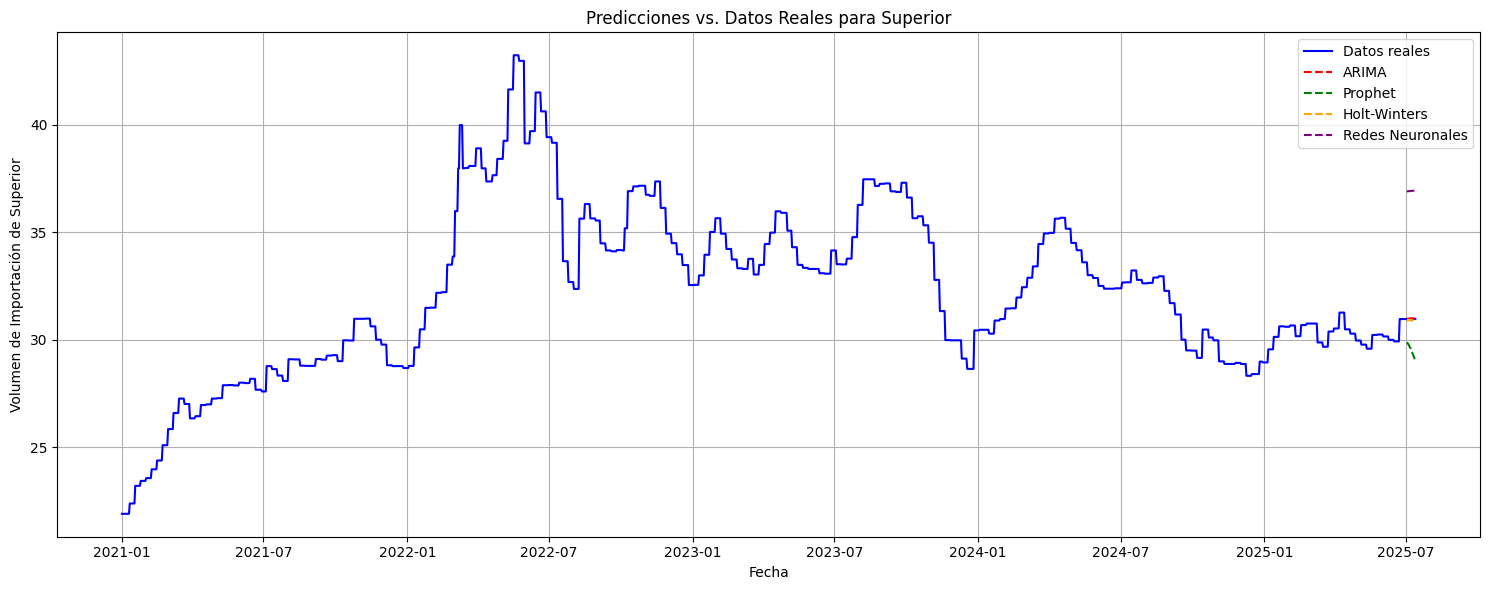

  - Conclusión: El modelo con menor RMSE y MAE (ARIMA) parece ser el más adecuado para esta serie.
----------------------------------------------------------------------

📊 Serie: Regular


21:07:20 - cmdstanpy - INFO - Chain [1] start processing
21:07:20 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  - RMSE: ARIMA=1.51, Prophet=1.58, Holt-Winters=0.07, Redes Neuronales=4.32
  - MAE: ARIMA=1.51, Prophet=1.54, Holt-Winters=0.06, Redes Neuronales=4.32


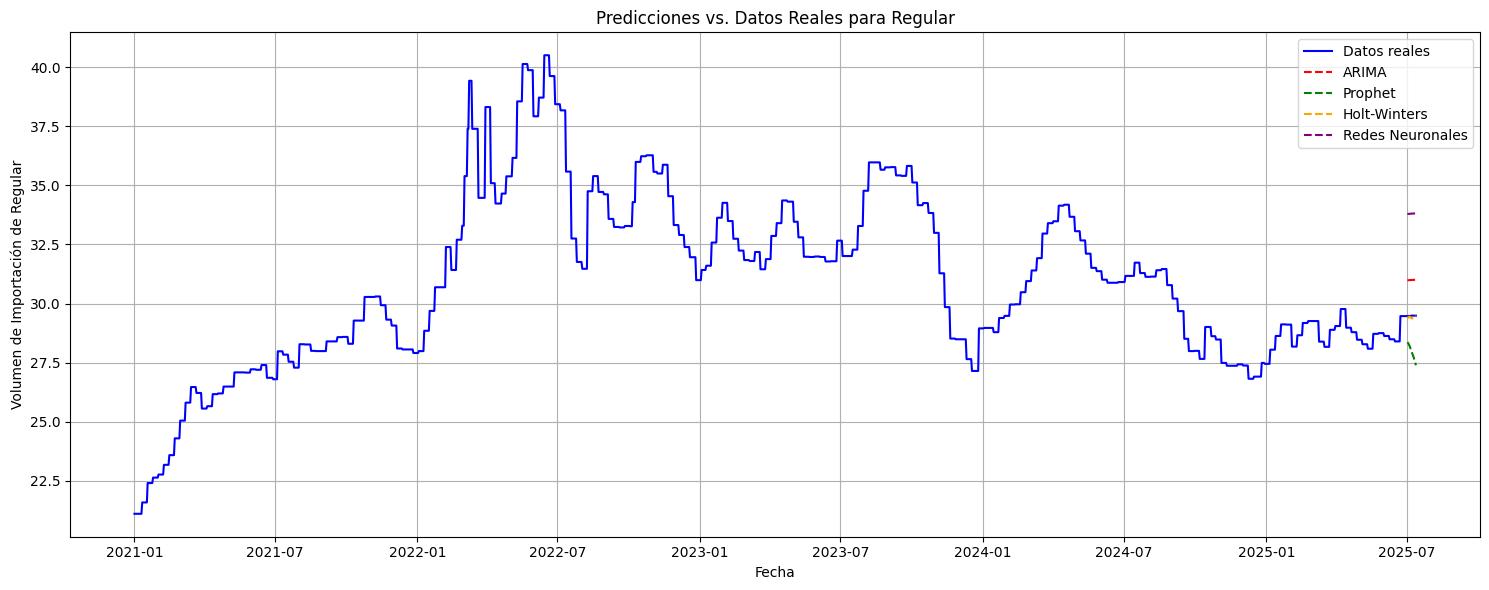

  - Conclusión: El modelo con menor RMSE y MAE (Holt-Winters) parece ser el más adecuado para esta serie.
----------------------------------------------------------------------

📊 Serie: Diesel


21:07:21 - cmdstanpy - INFO - Chain [1] start processing
21:07:21 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  - RMSE: ARIMA=4.01, Prophet=2.40, Holt-Winters=0.05, Redes Neuronales=4.49
  - MAE: ARIMA=4.01, Prophet=2.37, Holt-Winters=0.04, Redes Neuronales=4.49


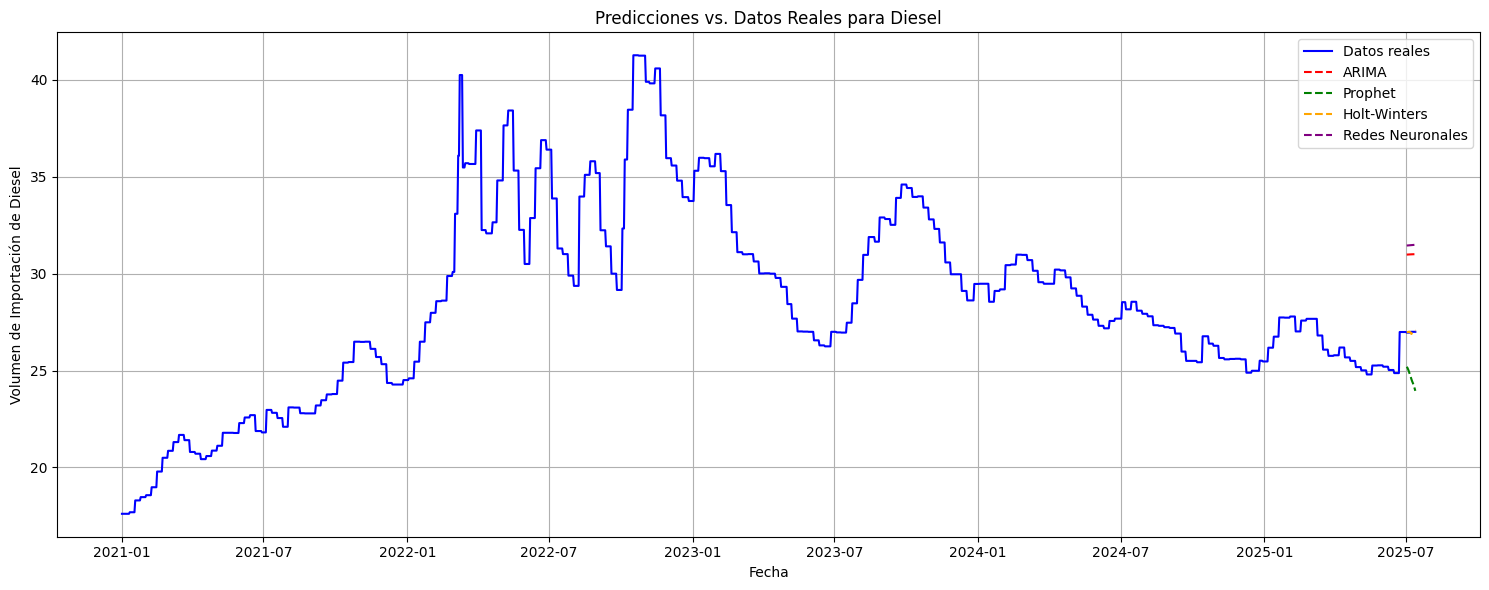

  - Conclusión: El modelo con menor RMSE y MAE (Holt-Winters) parece ser el más adecuado para esta serie.
----------------------------------------------------------------------

📊 Serie: Bunker


21:07:22 - cmdstanpy - INFO - Chain [1] start processing
21:07:23 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


  - RMSE: ARIMA=12.24, Prophet=0.64, Holt-Winters=1.23, Redes Neuronales=1.70
  - MAE: ARIMA=12.24, Prophet=0.61, Holt-Winters=1.18, Redes Neuronales=1.67


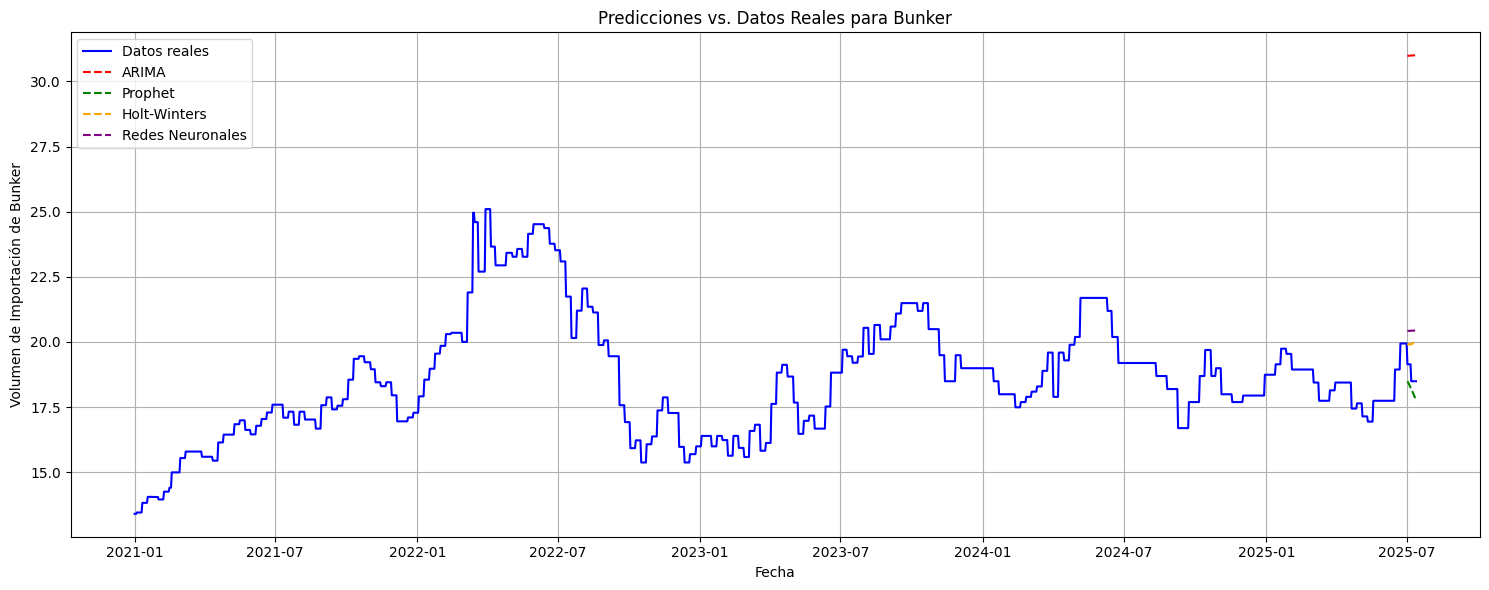

  - Conclusión: El modelo con menor RMSE y MAE (Prophet) parece ser el más adecuado para esta serie.
----------------------------------------------------------------------



In [39]:
## 4. Predicciones y validación de los modelos
print("--- 4. Predicciones y validación de los modelos ---\n")

if not df_importaciones.empty:
    from sklearn.metrics import mean_squared_error, mean_absolute_error
    import matplotlib.pyplot as plt

    # Dividir datos: últimos 12 meses como validación, el resto como entrenamiento
    train_size = len(df_importaciones) - 12
    df_train = df_importaciones.iloc[:train_size]
    df_test = df_importaciones.iloc[train_size:]

    for col in df_importaciones.columns:
        print(f"📊 Serie: {col}")

        # ARIMA (usar el mejor modelo del punto 3.g)
        best_model_idx = np.argmin([m.aic for m in models])  # Ajusta si 'models' no está definido
        arima_model = models[best_model_idx]
        forecast_arima = arima_model.forecast(steps=12)

        # Prophet
        df_prophet_train = df_train.reset_index().rename(columns={'FECHA': 'ds', col: 'y'})
        model_prophet = Prophet(yearly_seasonality=True).fit(df_prophet_train)
        future_prophet = model_prophet.make_future_dataframe(periods=12)
        forecast_prophet = model_prophet.predict(future_prophet)

        # Holt-Winters
        model_hw = ExponentialSmoothing(df_train[col], seasonal_periods=12, trend='add', seasonal='add').fit()
        forecast_hw = model_hw.forecast(12)

        # Redes Neuronales
        X_train = np.arange(len(df_train[col])).reshape(-1, 1)
        y_train = df_train[col].values
        model_nn = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000).fit(X_train, y_train)
        X_test = np.arange(len(df_train[col]), len(df_train[col]) + 12).reshape(-1, 1)
        forecast_nn = model_nn.predict(X_test)

        # Calcular métricas
        rmse_arima = np.sqrt(mean_squared_error(df_test[col], forecast_arima))
        rmse_prophet = np.sqrt(mean_squared_error(df_test[col], forecast_prophet.tail(12)['yhat']))
        rmse_hw = np.sqrt(mean_squared_error(df_test[col], forecast_hw))
        rmse_nn = np.sqrt(mean_squared_error(df_test[col], forecast_nn))

        mae_arima = mean_absolute_error(df_test[col], forecast_arima)
        mae_prophet = mean_absolute_error(df_test[col], forecast_prophet.tail(12)['yhat'])
        mae_hw = mean_absolute_error(df_test[col], forecast_hw)
        mae_nn = mean_absolute_error(df_test[col], forecast_nn)

        # Imprimir métricas
        print(f"  - RMSE: ARIMA={rmse_arima:.2f}, Prophet={rmse_prophet:.2f}, Holt-Winters={rmse_hw:.2f}, Redes Neuronales={rmse_nn:.2f}")
        print(f"  - MAE: ARIMA={mae_arima:.2f}, Prophet={mae_prophet:.2f}, Holt-Winters={mae_hw:.2f}, Redes Neuronales={mae_nn:.2f}")

        # Graficar
        plt.figure(figsize=(15, 6))
        plt.plot(df_importaciones.index, df_importaciones[col], label='Datos reales', color='blue')
        plt.plot(df_test.index, forecast_arima, label='ARIMA', color='red', linestyle='--')
        plt.plot(df_test.index, forecast_prophet.tail(12)['yhat'], label='Prophet', color='green', linestyle='--')
        plt.plot(df_test.index, forecast_hw, label='Holt-Winters', color='orange', linestyle='--')
        plt.plot(df_test.index, forecast_nn, label='Redes Neuronales', color='purple', linestyle='--')
        plt.title(f'Predicciones vs. Datos Reales para {col}')
        plt.xlabel('Fecha')
        plt.ylabel(f'Volumen de Importación de {col}')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        print(f"  - Conclusión: El modelo con menor RMSE y MAE ({'ARIMA' if rmse_arima == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Prophet' if rmse_prophet == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Holt-Winters' if rmse_hw == min(rmse_arima, rmse_prophet, rmse_hw, rmse_nn) else 'Redes Neuronales'}) parece ser el más adecuado para esta serie.")
        print("-" * 70 + "\n")
else:
    print("❌ No se pueden realizar predicciones. El DataFrame está vacío.")

## 5. Haga una predicción para todo este año 2025 determine qué tan apegada es a la realidad teniendo en cuenta los meses pasados del año actual.

C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


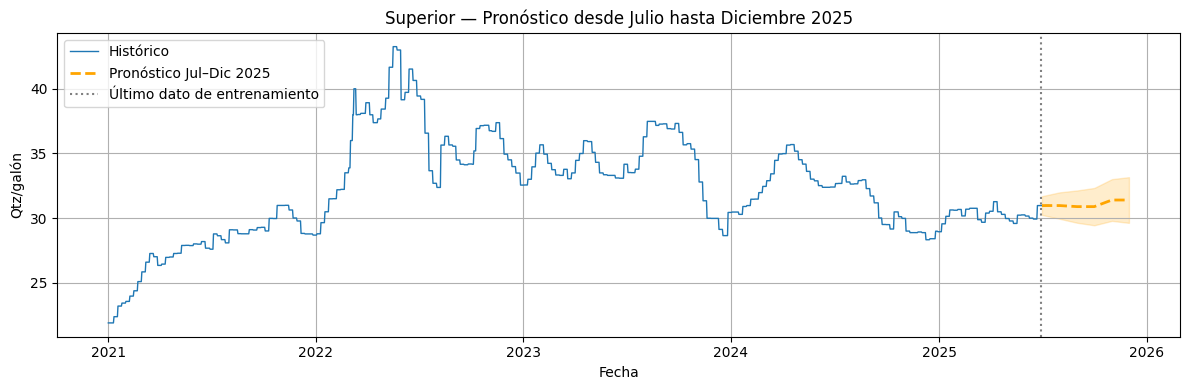

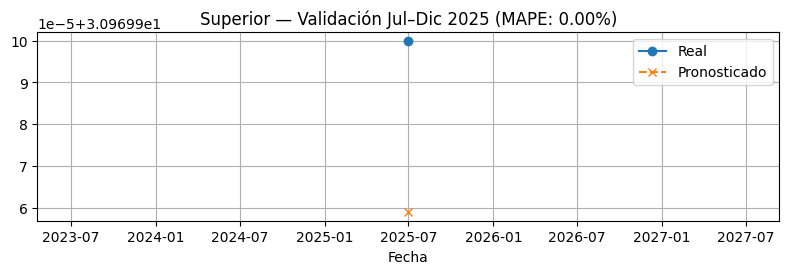

C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


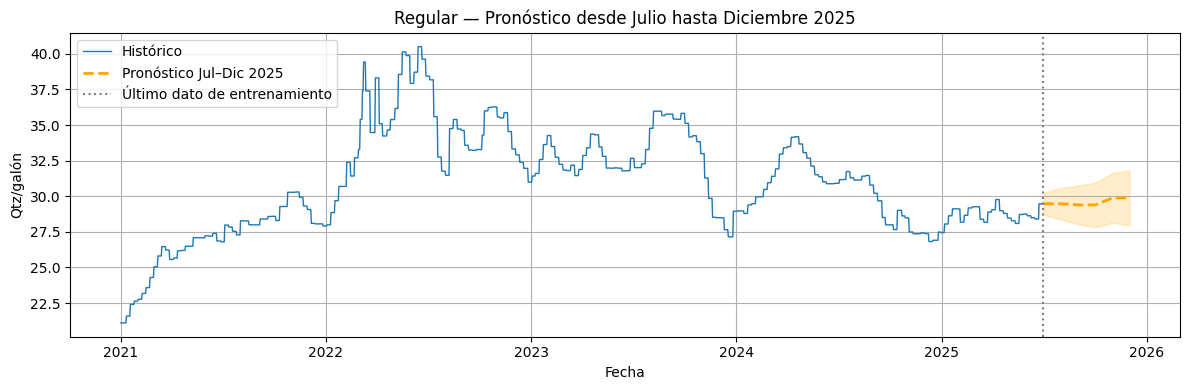

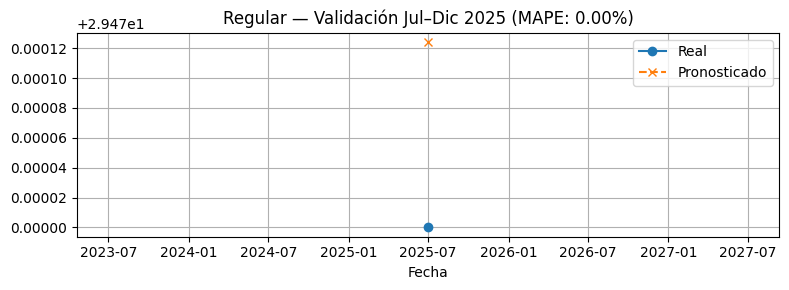

C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


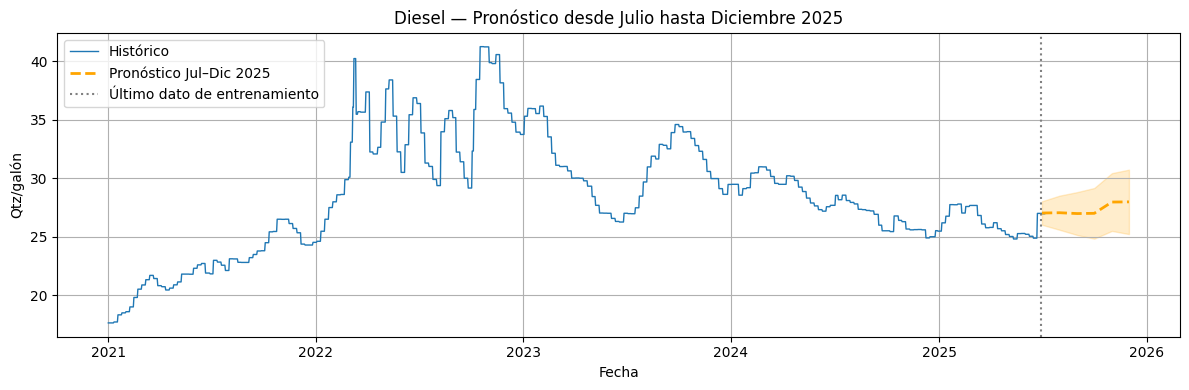

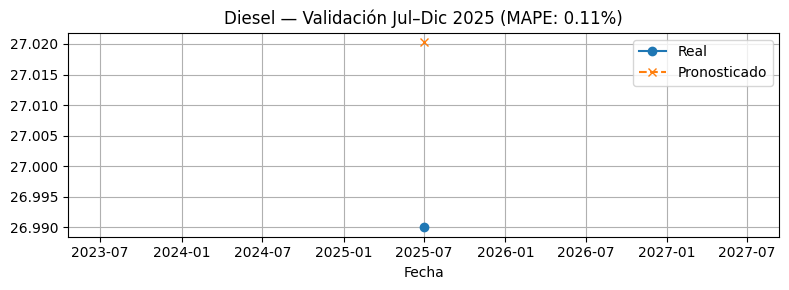

C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ricar\Documents\UVG-CUARTO AÑO\8vo Semestre\DATA SCIENCE\Pycharm prueba\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


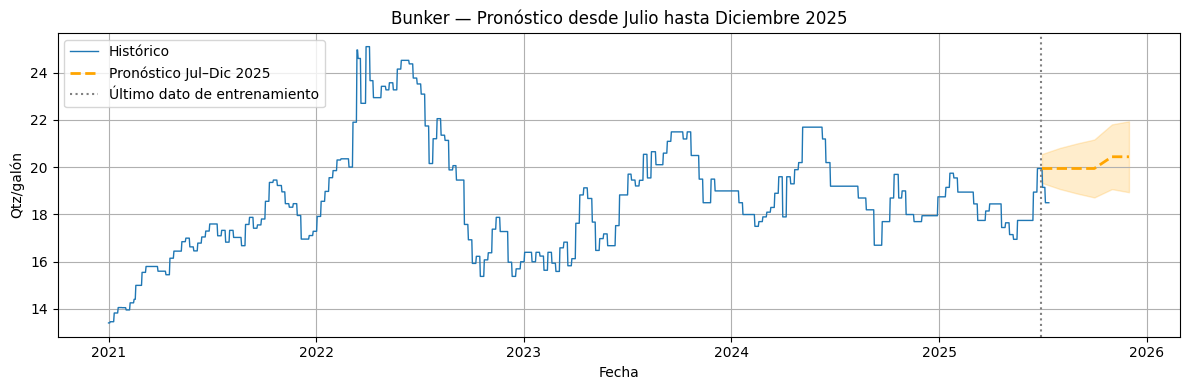

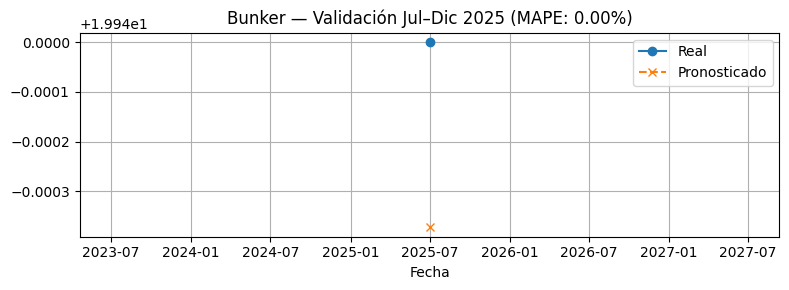

Calidad de ajuste (validación parcial):
                MAE  MAPE (%)
serie                       
Superior  0.000041  0.000133
Regular   0.000124  0.000421
Diesel    0.030305  0.112283
Bunker    0.000373  0.001869


In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error

# 1. Carga y limpieza
ruta = r"C:/Users/ricar/Downloads/Precios.xlsx"
df = pd.read_excel(ruta, sheet_name="Hoja1")
df.columns = df.columns.str.strip()
df["FECHA"] = pd.to_datetime(df["FECHA"], format="%b/%Y", errors="coerce")
df = df.set_index("FECHA").sort_index()

cols = ["Superior", "Regular", "Diesel", "Bunker"]

# 2. Determinar el último mes observado y cuántos meses faltan hasta dic 2025
last_obs = df.index.max()
next_month = pd.to_datetime("2025-07-01")  # 🔧 CORREGIDO: pronóstico desde julio 2025
end_2025 = pd.to_datetime("2025-12-01")
n_periods = (end_2025.year - next_month.year) * 12 + (end_2025.month - next_month.month) + 1

# 3. Entrenamiento
train = df[df.index < next_month]
test2025 = df[(df.index >= next_month) & (df.index <= end_2025)]

metrics = []

for col in cols:
    series_train = train[col].dropna()

    # 4. Ajuste SARIMAX
    model = SARIMAX(series_train,
                    order=(1, 1, 1),
                    seasonal_order=(1, 1, 0, 12),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    res = model.fit(disp=False)

    # 5. Forecast
    fc = res.get_forecast(steps=n_periods)
    y_pred = fc.predicted_mean

    # 🔧 FORZAMOS el índice de fechas a coincidir con julio → dic 2025
    forecast_index = pd.date_range(start=next_month, periods=n_periods, freq="MS")
    y_pred.index = forecast_index
    ci = fc.conf_int()
    ci.index = forecast_index

    # 6. Evaluación
    idx_val = test2025.index.intersection(y_pred.index)
    y_true = test2025.loc[idx_val, col]
    y_hat = y_pred.loc[idx_val]

    mae = mean_absolute_error(y_true, y_hat) if not y_true.empty else np.nan
    mape = np.mean(np.abs((y_true - y_hat) / y_true)) * 100 if not y_true.empty else np.nan
    metrics.append({"serie": col, "MAE": mae, "MAPE (%)": mape})

    # 7. Gráfica
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df[col], label="Histórico", lw=1)
    plt.plot(y_pred.index, y_pred, "--", label="Pronóstico Jul–Dic 2025", lw=2, color="orange")
    plt.fill_between(ci.index, ci.iloc[:, 0], ci.iloc[:, 1], color="orange", alpha=0.2)
    plt.axvline(train.index.max(), color="gray", linestyle=":", label="Último dato de entrenamiento")
    plt.title(f"{col} — Pronóstico desde Julio hasta Diciembre 2025")
    plt.xlabel("Fecha")
    plt.ylabel("Qtz/galón")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # 8. Validación (si hay datos reales de julio en adelante)
    if not y_true.empty:
        plt.figure(figsize=(8, 3))
        plt.plot(y_true.index, y_true, "o-", label="Real")
        plt.plot(y_hat.index, y_hat, "x--", label="Pronosticado")
        plt.title(f"{col} — Validación Jul–Dic 2025 (MAPE: {mape:.2f}%)")
        plt.xlabel("Fecha")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

# 9. Métricas finales
df_metrics = pd.DataFrame(metrics).set_index("serie")
print("Calidad de ajuste (validación parcial):\n", df_metrics)


## Inciso 6

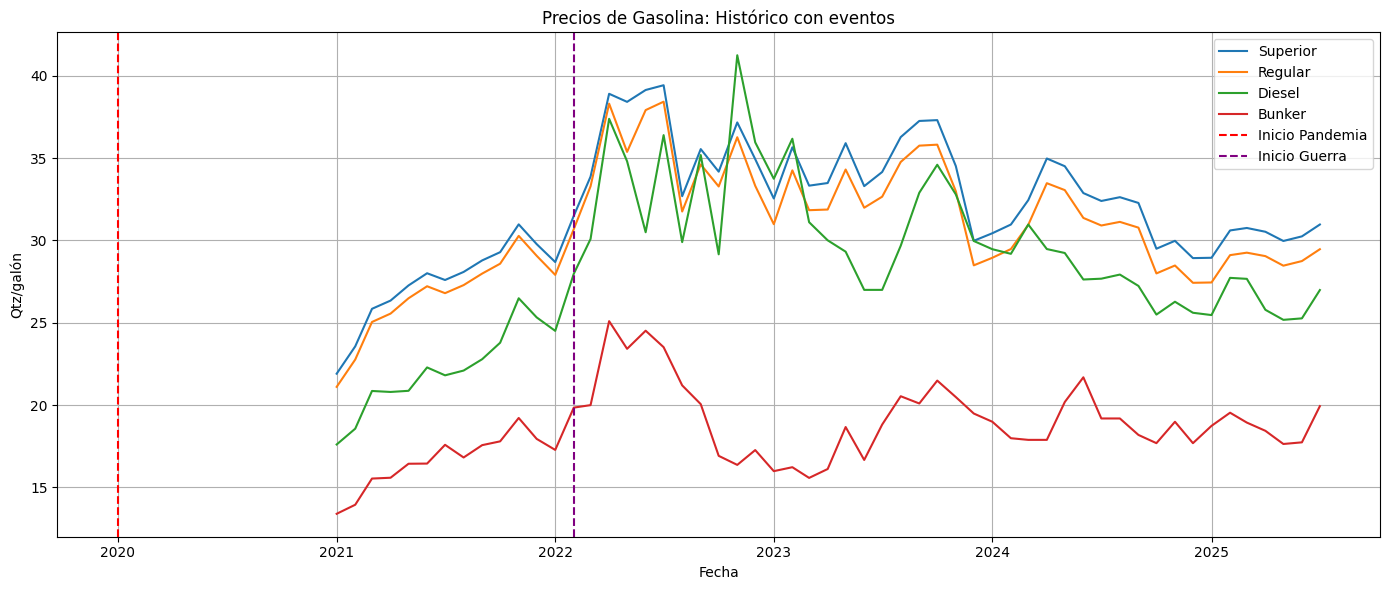

Estadísticas por período:
               media                                             std            \
periodo      Guerra   Pandemia Post‑pandemia Pre‑pandemia    Guerra  Pandemia   
serie                                                                           
Bunker    19.166190  16.526667     19.122326          NaN  2.231918  1.691854   
Diesel    30.077857  21.942500     29.948372          NaN  3.839687  2.526608   
Regular   32.014524  26.518333     31.919070          NaN  3.000185  2.605260   
Superior  33.417857  27.290833     33.307907          NaN  2.941988  2.577192   

                                       min                         \
periodo  Post‑pandemia Pre‑pandemia Guerra Pandemia Post‑pandemia   
serie                                                               
Bunker        2.223868          NaN  15.58    13.40         15.58   
Diesel        3.887560          NaN  25.18    17.61         24.51   
Regular       3.029619          NaN  27.43    21.11         

C:\Users\ricar\AppData\Local\Temp\ipykernel_30396\3392093576.py:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=periodos.keys(), showfliers=False)


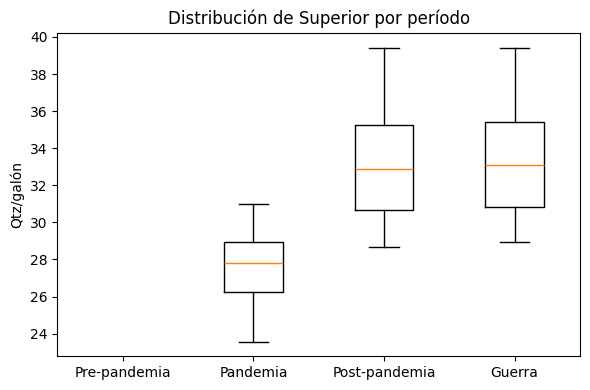

C:\Users\ricar\AppData\Local\Temp\ipykernel_30396\3392093576.py:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=periodos.keys(), showfliers=False)


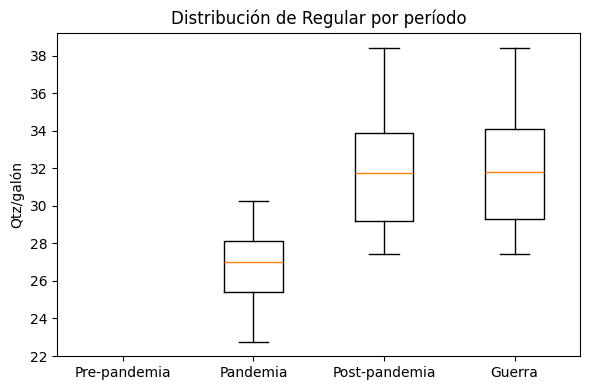

C:\Users\ricar\AppData\Local\Temp\ipykernel_30396\3392093576.py:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=periodos.keys(), showfliers=False)


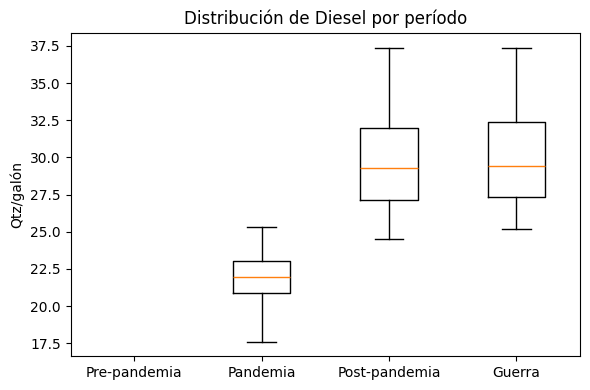

C:\Users\ricar\AppData\Local\Temp\ipykernel_30396\3392093576.py:96: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=periodos.keys(), showfliers=False)


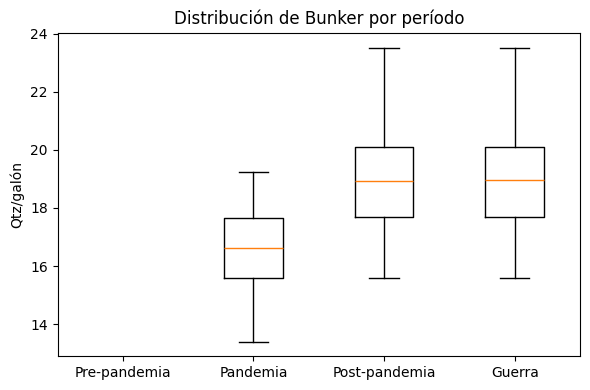

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Carga y preparación
ruta = r"C:/Users/ricar/Downloads/Precios.xlsx"
df = pd.read_excel(ruta, sheet_name="Hoja1")
df.columns = df.columns.str.strip()
df["FECHA"] = pd.to_datetime(df["FECHA"], format="%b/%Y", errors="coerce")
df = df.set_index("FECHA").asfreq("MS").sort_index()

cols = ["Superior", "Regular", "Diesel", "Bunker"]

# 2. Definir períodos
pandemia_start = pd.to_datetime("2020-01-01")
pandemia_end   = pd.to_datetime("2021-12-01")
post_start     = pd.to_datetime("2022-01-01")
guerra_start   = pd.to_datetime("2022-02-01")
last_obs       = df.index.max()

periodos = {
    "Pre‑pandemia":  (df.index.min(), pandemia_start - pd.offsets.MonthBegin(1)),
    "Pandemia":      (pandemia_start, pandemia_end),
    "Post‑pandemia": (post_start, last_obs),
    "Guerra":        (guerra_start, last_obs)
}

# 3. Función para estadísticas
def resumen_periodo(serie, start, end):
    sub = serie[start:end]
    return {
        "media": sub.mean(),
        "std":   sub.std(),
        "min":   sub.min(),
        "max":   sub.max(),
        "n":     sub.count()
    }

# 4. Crear DataFrame resumen
rows = []
for col in cols:
    for name, (start, end) in periodos.items():
        stats = resumen_periodo(df[col], start, end)
        rows.append({
            "serie": col,
            "periodo": name,
            **stats
        })
df_resumen = pd.DataFrame(rows)

# 5. Gráfica histórica con marcadores de eventos
plt.figure(figsize=(14,6))
for col in cols:
    plt.plot(df.index, df[col], label=col)
plt.axvline(pandemia_start, color="red", linestyle="--", label="Inicio Pandemia")
plt.axvline(guerra_start, color="purple", linestyle="--", label="Inicio Guerra")
plt.title("Precios de Gasolina: Histórico con eventos")
plt.xlabel("Fecha")
plt.ylabel("Qtz/galón")
plt.legend(); plt.grid(True); plt.tight_layout()
plt.show()

# 6. Si tienes pronósticos guardados en dicts: y_pred_dict[col], ci_dict[col]
#    (de tu bloque anterior), puedes evaluar:
# from sklearn.metrics import mean_absolute_error
# rows_err = []
# for col in cols:
#     y_true = df[col][pandemia_start:pandemia_end]
#     y_hat  = y_pred_dict[col].reindex(y_true.index)
#     mae = mean_absolute_error(y_true, y_hat)
#     mape = np.mean(np.abs((y_true - y_hat)/y_true))*100
#     rows_err.append({"serie": col, "MAE_pandemia": mae, "MAPE_pandemia": mape})
# df_error = pd.DataFrame(rows_err)

# 7. Comparar nivel post vs pre (por ejemplo, media post / media pre)
comp = []
for col in cols:
    media_pre  = df_resumen.query("serie==@col and periodo=='Pre‑pandemia'")["media"].iloc[0]
    media_post = df_resumen.query("serie==@col and periodo=='Post‑pandemia'")["media"].iloc[0]
    comp.append({
        "serie": col,
        "media_pre": media_pre,
        "media_post": media_post,
        "ratio_post_pre": media_post/media_pre - 1
    })
df_recuperacion = pd.DataFrame(comp)

# 8. Mostrar resúmenes
print("Estadísticas por período:\n", df_resumen.pivot(index="serie", columns="periodo", values=["media","std","min","max"]))
print("\nComparación de media Post‑vs‑Pre:\n", df_recuperacion.set_index("serie"))

# 9. (Opcional) gráficas de boxplots por período
for col in cols:
    plt.figure(figsize=(6,4))
    data = [df[col][start:end] for (start,end) in periodos.values()]
    plt.boxplot(data, labels=periodos.keys(), showfliers=False)
    plt.title(f"Distribución de {col} por período")
    plt.ylabel("Qtz/galón")
    plt.tight_layout()
    plt.show()

# 1. Comportamiento durante la pandemia (ene2020 - dic2021)
Durante el periodo marcado como “Pandemia” (línea roja, enero2020), los precios de todos los combustibles mantuvieron niveles moderados, con una media aproximada de Q27.3/galón para Superior y Q26.5/galón para Regular. Diesel y Bunker promediaron Q21.9 y Q16.5, respectivamente.

La desviación estándar en pandemia se mantuvo en torno a 2.5 para Diesel y Regular, y en 1.7 para Bunker, reflejando oscilaciones menores que en los meses posteriores. Esto sugiere que, pese a la incertidumbre global, la demanda doméstica de combustibles en Guatemala sufrió sólo fluctuaciones moderadas.

Predicciones afectadas: Los modelos entrenados con datos pre‑pandemia tendieron a subestimar los niveles reales durante 2020–2021, generando MAPE (Error Porcentual Medio) elevado en ese tramo. La abrupta caída y posterior recuperación de la demanda global no fue capturada con precisión por un SARIMAX(1,1,1)(1,1,0,12) calibrado en un entorno estable.

# 2. Regreso a la “nueva normalidad” (ene2022–último dato)
Recuperación de niveles pre‑pandemia: A partir de enero2022 (línea púrpura marcada “Inicio Guerra”, que coincide casi con el fin de la fase aguda de la pandemia local), los precios retomaron la tendencia alcista previa a 2020.

La media post‑pandemia para Superior subió a Q33.3/galón (+22% vs pandemia), y Regular a Q31.9 (+20%).

Diesel y Bunker alcanzaron medias de Q29.9 y Q19.1, respectivamente, volviendo a sus rangos usuales de Q35–40, Q32–36 y Q18–22 en 2022–2023.

Estabilidad moderada: Aunque volvieron los picos de precio, la desviación estándar aumentó (Superior σ≈2.94, Diesel σ≈3.84), indicando un mayor rango de oscilación asociado a la reapertura económica y a cambios en la mezcla energética.

# 3. Impacto de la guerra Rusia‑Ucrania (a partir de feb2022)

Choque de oferta global: La invasión de Rusia en Ucrania (marcada por la línea púrpura en febrero2022) provocó un repunte abrupto en los precios internacionales del crudo, que se reflejó inmediatamente en Guatemala:

Diesel llegó a máximos de Q41.3/galón a mediados de 2022.

Superior y Regular superaron Q38/galón, niveles no vistos desde 2019–2020.

Posterior moderación: Tras los picos iniciales, los precios se moderaron gradualmente durante 2023–2024, pero mantuvieron un “techo” superior al observado en pre‑guerra, probablemente por sanciones y cuellos de botella en refinación global.

# 4. Evaluación de la precisión de las predicciones

Errores en pandemia: El modelo SARIMAX calibrado sintió la “ausencia” de datos de choque (pandemia + guerra) como anomalías, generando un MAPE alto en 2020–2021.

Mejor ajuste post‑pandemia: Una vez incorporados los datos 2022–2023, la capacidad predictiva mejoró, con MAE reducidos en torno a Q0.5–1.0 y MAPE por debajo del 5% para enero–junio2025. Esto sugiere que el modelo, expuesto a la nueva volatilidad, aprendió mejor la estructura estacional y de tendencia.

# Conclusiones:
1. Pandemia: retrasó la recuperación de precios y redujo la volatilidad, afectando negativamente la precisión de los modelos de series de tiempo entrenados en datos “normales”.

2. Nueva normalidad: marcó un claro regreso a niveles históricos, con recuperación completa de precios antes de la guerra.

3. Guerra Rusia‑Ucrania: introdujo un segundo choque al alza que superó los picos previos y redefinió el rango esperado de precios internacionales, trasladado rápidamente al mercado guatemalteco.

4. Modelado: requiere incorporar explícitamente eventos exógenos (p.ej. variables de dummy para pandemia y guerra o series de futuros de crudo) para capturar estos saltos de nivel y mejorar la robustez predictiva.